In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = "AppleGothic"
from IPython.display import Image

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from scipy import stats
import scipy 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pycaret.regression import *
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas_profiling
import statsmodels.api as sm
from sklearn.decomposition import PCA

### 자료 소개

**`grid_500.csv`는 전주시를 250x250 나눈 후 인구와 공간적 데이터, 그리고 범죄주의구간(폭행, 절도, 성폭행) 등급의 강도로 구성되어있다.  
해당 데이터를 통해 전주시의 3대 범죄 발생에 영향을 끼치는 요인을 파악 후 범죄 위험지역에 대해 판단해 보려한다.** 

**데이터는 국가정보포털에서 격자별 인구 및 건축물에 대한 데이터를 수집하였으며, 가로등 주차장 등은 각 데이터의 좌표를 기준으로 격자내의 개수를 입력하였다.**  
**범죄주의구간은 생활안전지도의 치안사고발생현황을 바탕으로 만들어진 범죄주의구간 (1~10등급)의 지도를 이용하여 격자별 주의구간의 등급을 산정했다. (각 등급의 최대값)**  
자료는 총 43개의 변수로 구성되어 있으며, 격자는 총 918개이다. 

#### raw data
<code>gird_500</code> = 전주시 범죄관련 데이터
- <code>INDEX</code> = 인덱스
- <code>ID</code> = 각 격자의 고유 ID
- <code>총인구</code> = 격자별 총인구
- <code>고등여성인구</code> = 격자별 고등학생 여성인구(이 변수는 성폭력 취약인구에 포함)
- <code>20대여성인구</code> = 격자별 20대 여성인구(이 변수는 성폭력 취약인구에 포함)
- <code>유소년인구</code> = 격자별 유소년인구(0~14세)
- <code>고령인구</code> = 격자별 고령인구(65세 이상)
- <code>30년이상35년미만건축물</code> = 30년이상 35년미만건축물의 수 
- <code>35년이상건축물</code> = 35년이상 건축물 
- <code>개별주택가격</code> = 격자별 개별주택가격의 평균 
- <code>공시지가</code> = 격자별 평균 공시지가 
- <code>행정동코드</code> = 격자가 속한 행정동
- <code>가로등</code> = 격자별 가로등의 수 
- <code>공영주차장</code> = 격자별 공영주차장수
- <code>공중화장실</code> = 격자별 공중화장실수
- <code>교육시설</code> = 격자별 교육시설의 수 (학원, 어린이집)
- <code>대규모점포</code> = 격자별 대규모 점포의 수 (홈플러스, 이마트 등)
- <code>대부업현황</code> = 격자별 대부업체의 수
- <code>룸살롱</code> = 격자별 룸살롱의 수 
- <code>버스정류장</code> = 격자별 버스정류장의 수
- <code>보안등</code> = 격자별 보안등의 수
- <code>상가</code> = 격자별 상가의 수 (교육시설,음식점,술집,도소매업 오락시설을 포함한 상가의 수)
- <code>숙박업소</code> = 격자별 숙박업소의 수
- <code>술집</code> = 격자별 술집 (술집+룸살롱)
- <code>어린이보호</code> = 격자별 어린이보호구역의 수
- <code>어린이집</code> = 격자별 어린이집 수
- <code>오락시설</code> = 격자별 오락시설 (노래방, 당구장, pc방 등)
- <code>원룸_오피스텔</code> = 격자별 원룸 및 오피스텔의 수
- <code>음식점</code> = 격자별 음식점 수
- <code>자율방범대</code> = 격자별 자율방범대 수
- <code>파출소</code> = 격자별 파출소의 수
- <code>cctv</code> = 격자별 cctv 수
- <code>신호등</code> = 격자별 신호등의 수
- <code>횡단보도</code> = 격자별 횡단보도의 수
- <code>GRADE_폭력</code> = 격자별 폭력주의등급(2~11)
- <code>GRADE_절도</code> = 격자별 절도주의등급(2~11)
- <code>GRADE_성폭력</code> = 격자별 성폭력주의등급(2~11)


In [19]:
grid_500 = pd.read_csv('/Users/gimdong-wan/Desktop/DataCampus/data/real_data/500grid_data.csv')

In [20]:
grid_500 = grid_500.fillna(0)

In [21]:
grid_500.head(3)

,INDEX,ID,총인구,고등여성인구,20대여성인구,유소년인구,고령인구,건축물(30_34),건축물(35),개별주택가격,공시지가,행정동코드,가로등,공영주차장,공중화장실,교육시설,대규모점포,대부업현황,룸살롱,버스정류장,보안등,상가,숙박업소,술집,어린이보호,어린이집,오락시설,원룸_오피스텔,음식점,자율방범대,파출소,cctv,신호등,횡단보도,GRADE_폭력,GRADE_절도,GRADE_성폭력
0,0,다마66a58a,1758,37,114,173,282,0,3,1.784059e+08,162445.31,중화산2동,8,1,4,10,0,0,0,0,22,30,0,1,0,2,0,12,10,0,0,3,0,1,5,3,0
1,1,다마68a60b,2551,37,170,218,643,81,381,9.432807e+07,429815.61,인후2동,30,0,2,4,0,0,0,1,7,92,0,2,3,2,3,69,23,1,0,11,7,45,6,5,3
2,2,다마69b61b,169,0,0,0,75,7,27,7.005660e+07,106154.66,우아1동,0,0,0,0,0,0,0,0,2,17,0,0,0,0,0,1,10,0,0,1,0,0,2,3,0


In [22]:
grid_500['성폭력취약인구'] = grid_500['고등여성인구']+grid_500['20대여성인구']
grid_500['건축물(30_)'] = grid_500['건축물(30_34)']+grid_500['건축물(35)']
grid_500['GRADE_폭력'] = grid_500['GRADE_폭력'].apply(lambda x: x-1 if x>0 else x)
grid_500['GRADE_절도'] = grid_500['GRADE_절도'].apply(lambda x: x-1 if x>0 else x)
grid_500['GRADE_성폭력'] = grid_500['GRADE_성폭력'].apply(lambda x: x-1 if x>0 else x)
grid_500 = grid_500.drop(columns = ['20대여성인구','고등여성인구','INDEX'])

In [23]:
grid_500.describe()

,총인구,유소년인구,고령인구,건축물(30_34),건축물(35),개별주택가격,공시지가,가로등,공영주차장,공중화장실,교육시설,대규모점포,대부업현황,룸살롱,버스정류장,보안등,상가,숙박업소,술집,어린이보호,어린이집,오락시설,원룸_오피스텔,음식점,자율방범대,파출소,cctv,신호등,횡단보도,GRADE_폭력,GRADE_절도,GRADE_성폭력,성폭력취약인구,건축물(30_)
count,918.000000,918.000000,918.000000,918.000000,918.000000,9.180000e+02,9.180000e+02,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.00000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,714.693900,82.391068,122.736383,5.587146,24.537037,8.729869e+07,1.898196e+05,16.093682,0.087146,0.352941,4.028322,0.041394,0.094771,0.299564,0.619826,11.122004,36.741830,0.449891,1.545752,0.267974,0.66122,0.899782,9.514161,13.002179,0.052288,0.020697,1.464052,4.141612,7.485839,1.172113,1.425926,0.614379,57.766885,30.124183
std,1532.693288,215.078664,260.815712,23.184117,77.426084,1.060985e+08,2.976483e+05,30.342177,0.411169,1.039906,12.948150,0.273168,0.402764,2.587323,1.345585,27.225147,90.192462,2.628423,5.550755,0.717501,1.99280,3.132616,30.737239,34.119266,0.241520,0.142446,2.832725,8.246316,15.055742,2.041768,2.332377,1.592475,132.421282,89.252670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.256998e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,0.000000,8.000000,0.000000,1.000000,6.405639e+07,5.336395e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,291.000000,21.000000,58.000000,1.000000,8.000000,1.220900e+08,2.356136e+05,20.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000,7.000000,17.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,4.000000,8.000000,1.000000,2.000000,0.000000,16.750000,10.000000
max,8753.000000,1996.000000,1573.000000,402.000000,682.000000,5.610000e+08,2.312433e+06,196.000000,6.000000,10.000000,126.000000,4.000000,4.000000,43.000000,11.000000,196.000000,1114.000000,28.000000,77.000000,6.000000,25.00000,40.000000,288.000000,328.000000,2.000000,1.000000,14.000000,54.000000,146.000000,10.000000,10.000000,10.000000,815.000000,718.000000


### 행정동별로 평균 범죄주의구간 등급 확인

In [24]:
#grid_500[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_500['행정동코드']).mean().sort_values('GRADE_폭력', ascending=False)
#grid_500[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_500['행정동코드']).mean().sort_values('GRADE_절도', ascending=False)
#grid_500[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_500['행정동코드']).mean().sort_values('GRADE_성폭력', ascending=False)
dong_rank = grid_500[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_500['행정동코드']).mean()
dong_rank.mean(axis=1).sort_values(ascending=False)

행정동코드
금암1동     5.750000
인후3동     5.133333
효자3동     4.777778
인후1동     4.733333
중앙동      4.733333
진북동      4.611111
평화1동     4.583333
중화산1동    4.533333
효자2동     4.444444
인후2동     4.166667
삼천2동     4.000000
금암2동     3.722222
중화산2동    3.541667
덕진동      3.460317
서신동      3.458333
완산동      3.444444
노송동      3.166667
우아1동     2.814815
효자1동     2.466667
효자5동     2.410256
풍남동      2.370370
삼천1동     2.333333
송천1동     2.314815
효자4동     1.219048
팔복동      1.089744
혁신동      0.900000
여의동      0.893939
서서학동     0.871795
송천2동     0.790123
평화2동     0.758454
호성동      0.720721
우아2동     0.581761
삼천3동     0.270833
조촌동      0.166667
동서학동     0.134259
dtype: float64

### 랭킹 
- 폭력
    - 금암1동, 인후3동, 인후1동, 인후2동, 중앙동
- 절도
    - 금암1동, 중앙동, 효자3동, 삼천2동, 인후2동
- 성폭력
    - 금암1동, 효자3동, 인후3동, 효자2동, 삼천2동
- 평균
    - 금암1동, 인후3동, 효자3동, 인후1동, 중앙동

In [25]:
grid_500.columns

Index(['ID', '총인구', '유소년인구', '고령인구', '건축물(30_34)', '건축물(35)', '개별주택가격', '공시지가',
       '행정동코드', '가로등', '공영주차장', '공중화장실', '교육시설', '대규모점포', '대부업현황', '룸살롱',
       '버스정류장', '보안등', '상가', '숙박업소', '술집', '어린이보호', '어린이집', '오락시설', '원룸_오피스텔',
       '음식점', '자율방범대', '파출소', 'cctv', '신호등', '횡단보도', 'GRADE_폭력', 'GRADE_절도',
       'GRADE_성폭력', '성폭력취약인구', '건축물(30_)'],
      dtype='object')

In [26]:
len(grid_500.query('GRADE_폭력==0 & GRADE_절도==0 & GRADE_성폭력==0'))

523

In [27]:
len(grid_500.query('GRADE_폭력!=0 & GRADE_절도!=0 & GRADE_성폭력!=0'))

136

In [28]:
len(grid_500.query('GRADE_폭력!=0 | GRADE_절도!=0 | GRADE_성폭력!=0'))

395

- 타겟이 모두 0인 로우 2434개
- 타겟이 모두 0보다 큰 로우 273개
- 타겟이 하나라도 0보다 큰 로우 1064개

In [29]:
feat_N = grid_500[(grid_500['총인구']==0)&(grid_500['건축물(30_34)']==0)&(grid_500['건축물(35)']==0)&(grid_500['가로등']==0)&(grid_500['공영주차장']==0)&(grid_500['공중화장실']==0)&(grid_500['숙박업소']==0)
        &(grid_500['대규모점포']==0)&(grid_500['대부업현황']==0)&(grid_500['상가']==0)&(grid_500['어린이보호']==0)&(grid_500['원룸_오피스텔']==0)&(grid_500['cctv']==0)&(grid_500['신호등']==0)&(grid_500['횡단보도']==0)
        &(grid_500['버스정류장']==0)&(grid_500['개별주택가격']==0)] #target 제외 모든 변수가 0인 row
feat_Y = grid_500[(grid_500['총인구']>0)|(grid_500['건축물(30_34)']>0)|(grid_500['건축물(35)']>0)|(grid_500['가로등']>0)|(grid_500['공영주차장']>0)|(grid_500['공중화장실']>0)|(grid_500['숙박업소']>0)
        |(grid_500['대규모점포']>0)|(grid_500['대부업현황']>0)|(grid_500['상가']>0)|(grid_500['어린이보호']>0)|(grid_500['원룸_오피스텔']>0)|(grid_500['cctv']>0)|(grid_500['신호등']>0)|(grid_500['횡단보도']>0)
        |(grid_500['버스정류장']>0)|(grid_500['개별주택가격']>0)] #target 제외 모든 변수가 0보다 큰 row


In [30]:
print(len(grid_500),len(feat_N),len(feat_Y))

918 253 665


- 모든 피쳐가 0인 행이 `1460`개이고, 한 피쳐라도 0보다 큰 행은 `2038`개 (공시지가와 타겟 제외)

In [31]:
print(len(grid_500[grid_500['GRADE_폭력']>0]),len(grid_500[grid_500['GRADE_절도']>0]),len(grid_500[grid_500['GRADE_성폭력']>0]))
print(len(feat_N[feat_N['GRADE_폭력']>0]),len(feat_N[feat_N['GRADE_절도']>0]),len(feat_N[feat_N['GRADE_성폭력']>0]))

330 317 142
3 2 2


- 폭력등급이 0보다 큰 로우는 900개, 절도 등급이 0보다 큰 로우는 836개, 성폭력 등급이 0보다 큰 로우는 303개가 있다. 
- 모든 피쳐가 0임에도 불구하고(1460개의 피쳐), 폭력등급이 있는 로우는 19개, 절도 13개, 성폭력 4개가 있었다.

### 피쳐가 없는 격자들 지도에서 탐색해보기

In [32]:
feat_N_ID = list(feat_N['ID'])

In [33]:
out = open('/Users/gimdong-wan/Desktop/out.txt','w')

In [34]:
print(feat_N_ID,file = out)

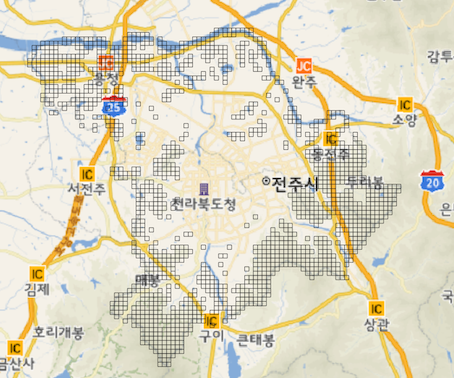

In [35]:
Image("/Users/gimdong-wan/Desktop/DataCampus/img/feat_N_grid/전체.png")

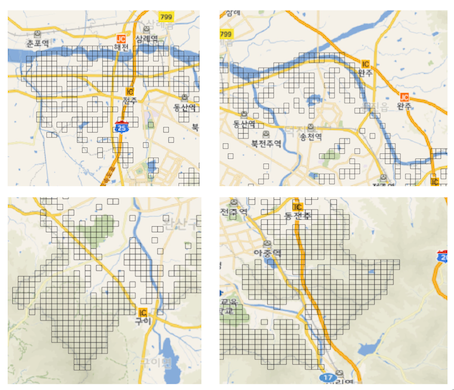

In [36]:
Image("/Users/gimdong-wan/Desktop/DataCampus/img/feat_N_grid/확대.png")

#### 해당 격자들은 대부분 산지나, 강, 도로 등 시설물이 없는 곳들을 나타낸다.  
#### 따라서 본 연구는 범죄에 영향을 미치는 요인을 파악하기 위함이므로 제거해도 좋을 것 이라 판단된다.

In [37]:
new_grid = feat_Y

In [38]:
new_grid.columns

Index(['ID', '총인구', '유소년인구', '고령인구', '건축물(30_34)', '건축물(35)', '개별주택가격', '공시지가',
       '행정동코드', '가로등', '공영주차장', '공중화장실', '교육시설', '대규모점포', '대부업현황', '룸살롱',
       '버스정류장', '보안등', '상가', '숙박업소', '술집', '어린이보호', '어린이집', '오락시설', '원룸_오피스텔',
       '음식점', '자율방범대', '파출소', 'cctv', '신호등', '횡단보도', 'GRADE_폭력', 'GRADE_절도',
       'GRADE_성폭력', '성폭력취약인구', '건축물(30_)'],
      dtype='object')

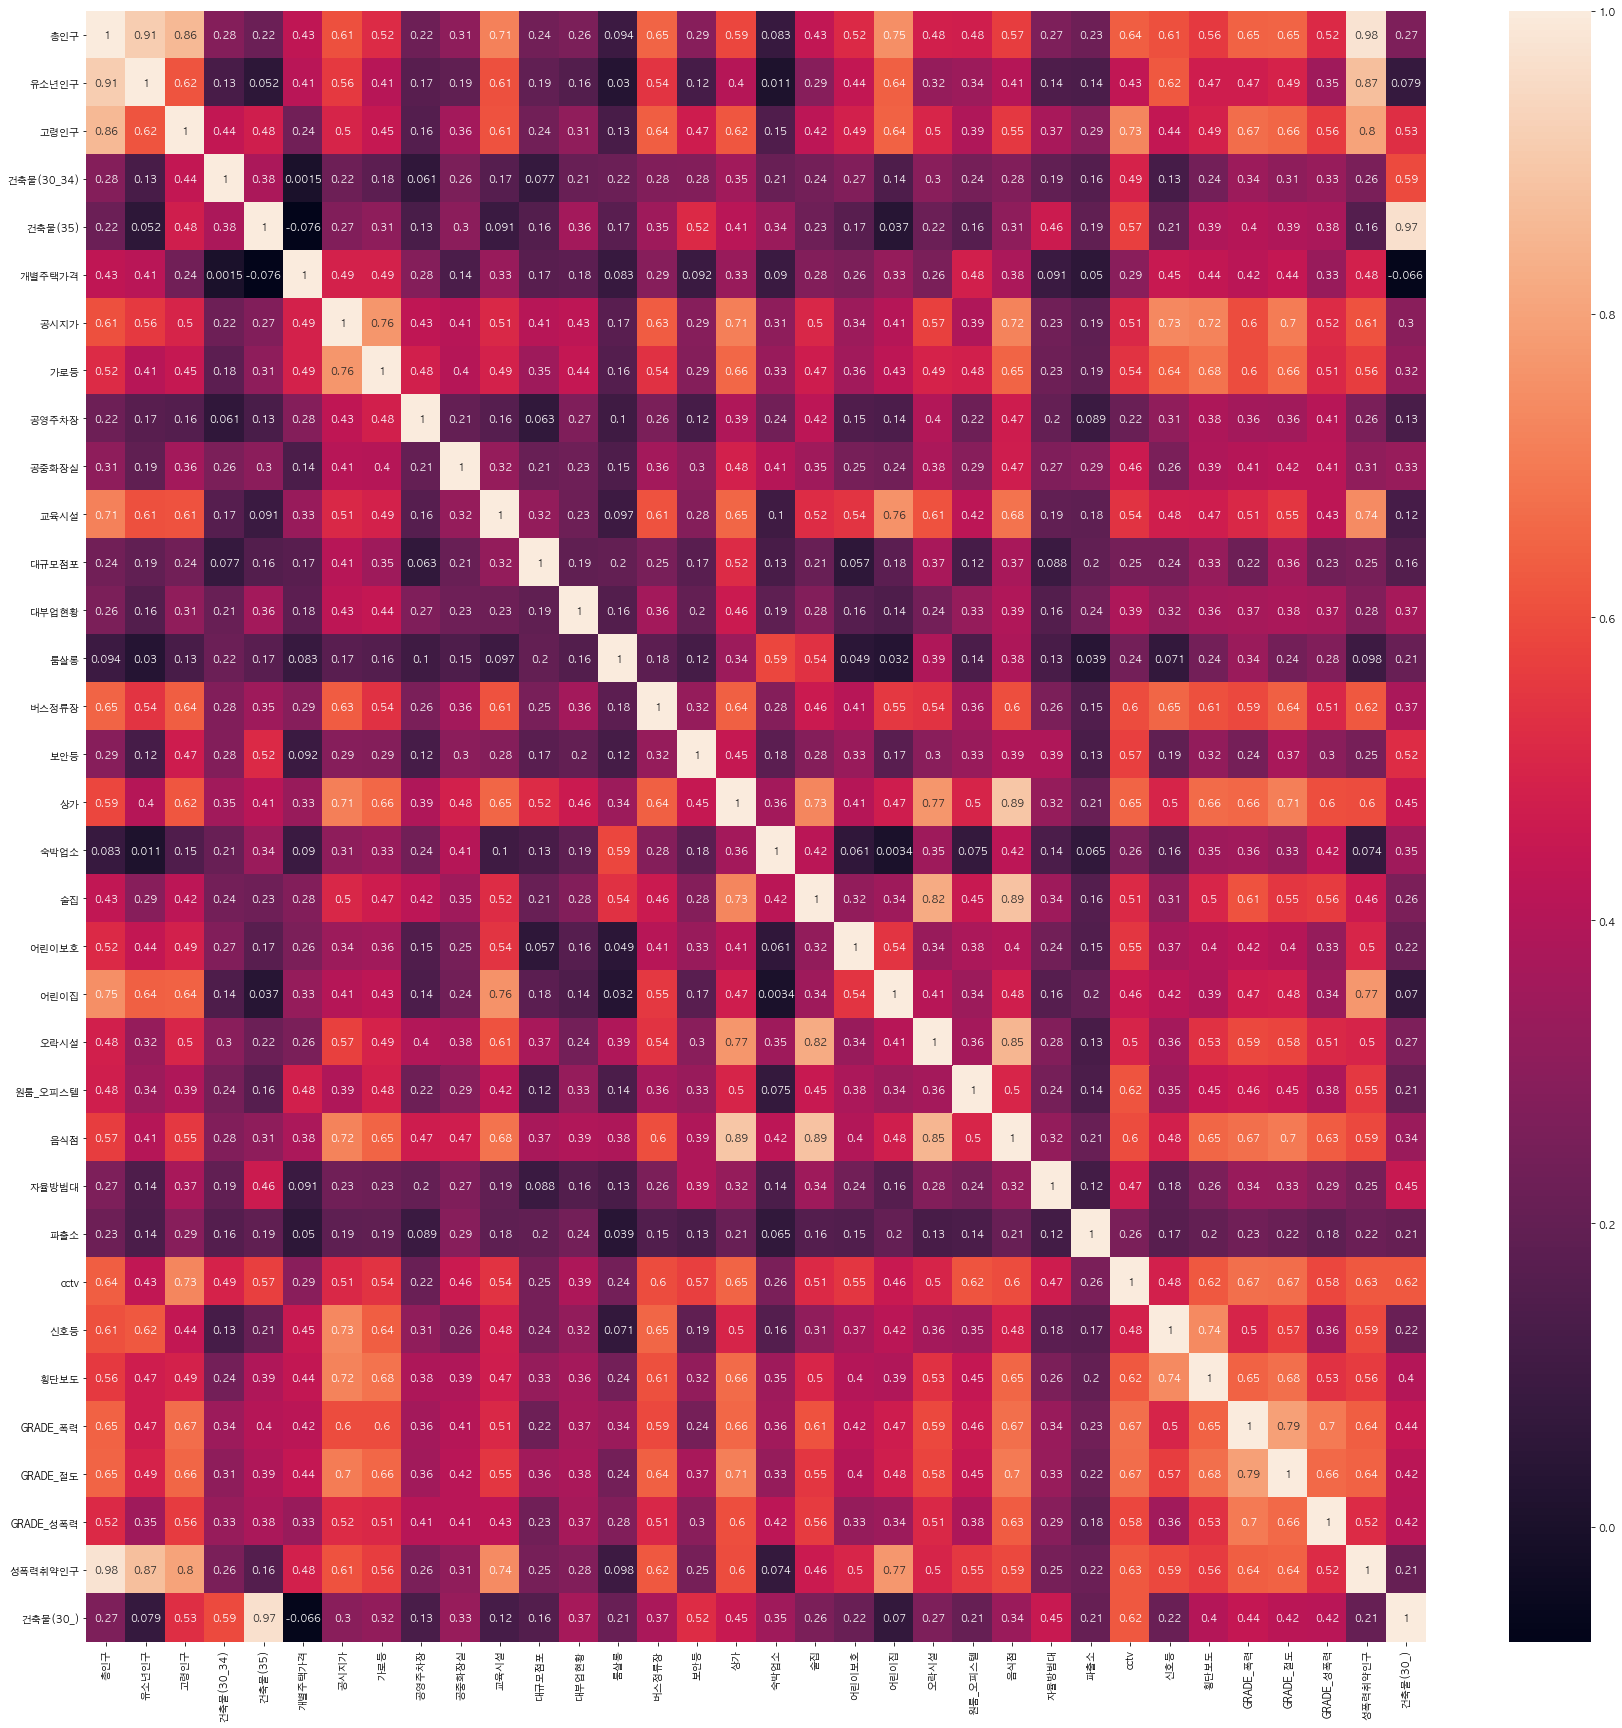

In [39]:
plt.figure(figsize=(30, 30))
sns.heatmap(new_grid.corr(), annot=True)
plt.show()

### 전체 변수 간 상관관계 
 - 인구 사회학적 변수는 변수간 상관관계가 크며, 이는 다중공선성 제거를 위해 변수를 선택할 필요가 있다. 또한, 대부분 범죄 등급과도 큰 상관관계를 보이고 있다. 

#### 종속변수 (3대범죄)를 기반으로 한 상관계수 확인
 - 폭력
     - `인구` : 총인구 (0.52),성폭력취약인구(0.51), 유소년인구(0.35), 고령인구(0.53)
     - `토지` : 30년 이상35년 미만 건축물(0.27), 35년 이상건축물(0.31), 30년 이상 건축물 (0.34),개별주택가격 (0.24), 공시지가(0.54)
     - `시설물` : 가로등(0.44), 공영주차장(0.25), 공중화장실(0.22), 교육시설(0.4), 대규모점포(0.16), 대부업체현황(0.2), 룸살롱(0.28), 버스정류장(0.35), 보안등(0.17), 상가(0.61), 숙박업소(0.29), 술집(0.54), 어린이보호구역(0.2), 어린이집(0.29), 오락시설(0.49), 원룸_오피스텔(0.36), 음식점(0.62), 자율방범대(0.17), 파출소(0.11), cctv(0.48), 신호등(0.32), 횡단보도(0.52),
     - `다른 범죄` : 절도(0.74), 성폭력(0.58)

 - 절도
     - `인구` : 총인구 (0.51),성폭력취약인구(0.51), 유소년인구(0.35), 고령인구(0.53)
     - `토지` : 30년 이상35년 미만 건축물(0.25), 35년 이상건축물(0.33), 30년 이상 건축물 (0.36),개별주택가격 (0.34), 공시지가(0.61)
     - `시설물` : 가로등(0.5), 공영주차장(0.25), 공중화장실(0.22), 교육시설(0.44), 대규모점포(0.26), 대부업체현황(0.21), 룸살롱(0.19), 버스정류장(0.4), 보안등(0.29), 상가(0.66), 숙박업소(0.26), 술집(0.45), 어린이보호구역(0.2), 어린이집(0.29), 오락시설(0.47), 원룸_오피스텔(0.36), 음식점(0.62), 자율방범대(0.11), 파출소(0.01), cctv(0.51), 신호등(0.33), 횡단보도(0.53),
     - `다른 범죄` : 폭력(0.74), 성폭력(0.55)

 - 성폭력
     - `인구` : 총인구 (0.27),성폭력취약인구(0.29), 유소년인구(0.16), 고령인구(0.29)
     - `토지` : 30년 이상35년 미만 건축물(0.21), 35년 이상건축물(0.18), 30년 이상 건축물 (0.22),개별주택가격 (0.2), 공시지가(0.41)
     - `시설물` : 가로등(0.33), 공영주차장(0.24), 공중화장실(0.19), 교육시설(0.25), 대규모점포(0.1), 대부업체현황(0.16), 룸살롱(0.28), 버스정류장(0.26), 보안등(0.15), 상가(0.45), 숙박업소(0.31), 술집(0.44), 어린이보호구역(0.1), 어린이집(0.14), 오락시설(0.41), 원룸_오피스텔(0.26), 음식점(0.51), 자율방범대(0.12), 파출소(0.07), cctv(0.32), 신호등(0.19), 횡단보도(0.37),
     - `다른 범죄` : 절도(0.58), 성폭력(0.55)

### 폭력 범죄 발생지/미발생지 t-test

In [40]:
violence_Y = new_grid[new_grid['GRADE_폭력']>0]
violence_N = new_grid[new_grid['GRADE_폭력']==0]
print('폭력 발생지 로우 수 :',len(violence_Y),'폭력 미발생지 로우 수 :',len(violence_N))

폭력 발생지 로우 수 : 327 폭력 미발생지 로우 수 : 338


x1_mean :  1878.1284403669724 / x2_mean :  124.08579881656804


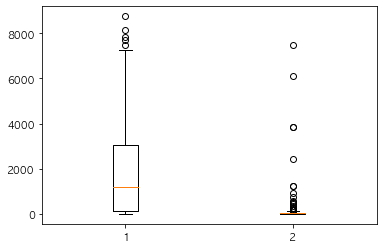

LeveneResult(statistic=312.07871603273713, pvalue=1.5926214127977728e-57)


Ttest_indResult(statistic=15.008220915631457, pvalue=2.0616566018426276e-40)

In [41]:
x1 = np.array(violence_Y['총인구'])
x2 = np.array(violence_N['총인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['총인구']), np.array(violence_N['총인구'])))
scipy.stats.ttest_ind(np.array(violence_Y['총인구']), np.array(violence_N['총인구']), equal_var=False)

##### 총인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  155.77675840978594 / x2_mean :  6.186390532544379


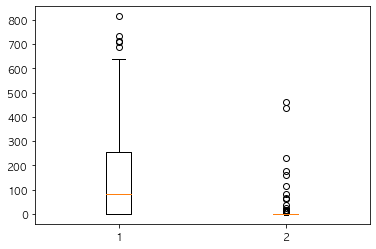

LeveneResult(statistic=288.6379959596319, pvalue=5.211142241787469e-54)


Ttest_indResult(statistic=14.61951200023577, pvalue=2.991542661149064e-38)

In [42]:
x1 = np.array(violence_Y['성폭력취약인구'])
x2 = np.array(violence_N['성폭력취약인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['성폭력취약인구']), np.array(violence_N['성폭력취약인구'])))
scipy.stats.ttest_ind(np.array(violence_Y['성폭력취약인구']), np.array(violence_N['성폭력취약인구']), equal_var=False)

##### 성폭력 취약인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  209.5474006116208 / x2_mean :  21.04437869822485


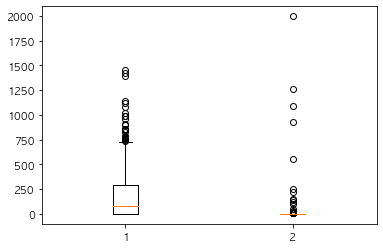

LeveneResult(statistic=115.81622119918828, pvalue=5.275051833976832e-25)


Ttest_indResult(statistic=10.612676600268452, pvalue=7.30864069118323e-24)

In [43]:
x1 = np.array(violence_Y['유소년인구'])
x2 = np.array(violence_N['유소년인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['유소년인구']), np.array(violence_N['유소년인구'])))
scipy.stats.ttest_ind(np.array(violence_Y['유소년인구']), np.array(violence_N['유소년인구']), equal_var=False)

##### 유소년 취약인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  325.2905198776758 / x2_mean :  18.644970414201183


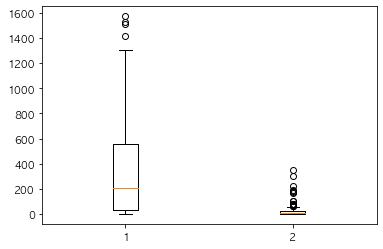

LeveneResult(statistic=343.36005193643075, pvalue=4.387888327699888e-62)


Ttest_indResult(statistic=15.54910680996332, pvalue=2.30894159984413e-41)

In [44]:
x1 = np.array(violence_Y['고령인구'])
x2 = np.array(violence_N['고령인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['고령인구']), np.array(violence_N['고령인구'])))
scipy.stats.ttest_ind(np.array(violence_Y['고령인구']), np.array(violence_N['고령인구']), equal_var=False)

##### 고령인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  14.880733944954128 / x2_mean :  0.7781065088757396


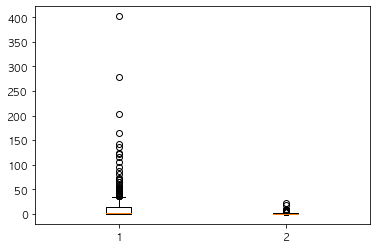

LeveneResult(statistic=48.11533940244175, pvalue=9.569320975626158e-12)


Ttest_indResult(statistic=6.872819930587848, pvalue=3.181631115720218e-11)

In [45]:
x1 = np.array(violence_Y['건축물(30_34)'])
x2 = np.array(violence_N['건축물(30_34)'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['건축물(30_34)']), np.array(violence_N['건축물(30_34)'])))
scipy.stats.ttest_ind(np.array(violence_Y['건축물(30_34)']), np.array(violence_N['건축물(30_34)']), equal_var=False)

##### 건축물(30~34년) 유의한 차이를 보인다

x1_mean :  63.77064220183486 / x2_mean :  4.946745562130178


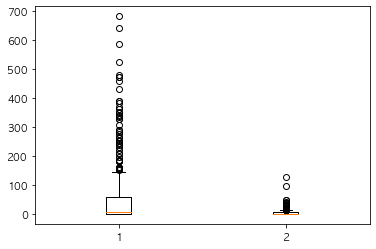

LeveneResult(statistic=80.05967160602118, pvalue=3.605417028879869e-18)


Ttest_indResult(statistic=8.850444183177348, pvalue=5.3262190916839864e-17)

In [46]:
x1 = np.array(violence_Y['건축물(35)'])
x2 = np.array(violence_N['건축물(35)'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['건축물(35)']), np.array(violence_N['건축물(35)'])))
scipy.stats.ttest_ind(np.array(violence_Y['건축물(35)']), np.array(violence_N['건축물(35)']), equal_var=False)

##### 35년이상 건축물 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  78.65137614678899 / x2_mean :  5.724852071005917


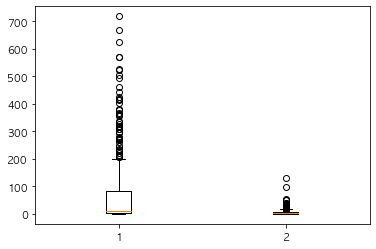

LeveneResult(statistic=96.38941406224394, pvalue=2.4694224858442465e-21)


Ttest_indResult(statistic=9.639828476468052, pvalue=1.52431004834751e-19)

In [47]:
x1 = np.array(violence_Y['건축물(30_)'])
x2 = np.array(violence_N['건축물(30_)'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['건축물(30_)']), np.array(violence_N['건축물(30_)'])))
scipy.stats.ttest_ind(np.array(violence_Y['건축물(30_)']), np.array(violence_N['건축물(30_)']), equal_var=False)

##### 30년이상 건축물에서 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  166338326.58740062 / x2_mean :  76176239.62449704


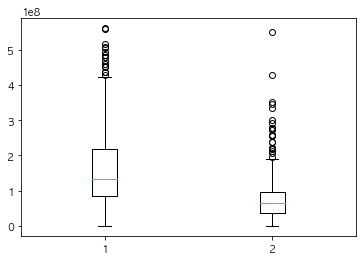

LeveneResult(statistic=54.02955305325897, pvalue=5.834422764300512e-13)


Ttest_indResult(statistic=11.826519392053838, pvalue=7.477459261102014e-29)

In [48]:
x1 = np.array(violence_Y['개별주택가격'])
x2 = np.array(violence_N['개별주택가격'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['개별주택가격']), np.array(violence_N['개별주택가격'])))
scipy.stats.ttest_ind(np.array(violence_Y['개별주택가격']), np.array(violence_N['개별주택가격']), equal_var=False)

##### 개별주택가격에서 유의한 차이를 보인다. (2배정도)

x1_mean :  422094.47819571866 / x2_mean :  93855.79852071006


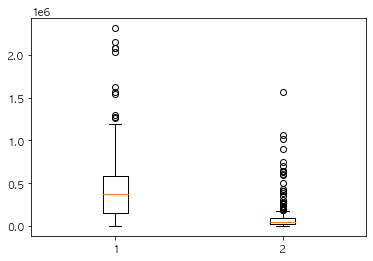

LeveneResult(statistic=135.08810479684266, pvalue=1.4978557341010678e-28)


Ttest_indResult(statistic=14.952263518039148, pvalue=2.7149158801147567e-41)

In [49]:
x1 = np.array(violence_Y['공시지가'])
x2 = np.array(violence_N['공시지가'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['공시지가']), np.array(violence_N['공시지가'])))
scipy.stats.ttest_ind(np.array(violence_Y['공시지가']), np.array(violence_N['공시지가']), equal_var=False)

##### 가로등수에서도 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  0.23547400611620795 / x2_mean :  0.008875739644970414


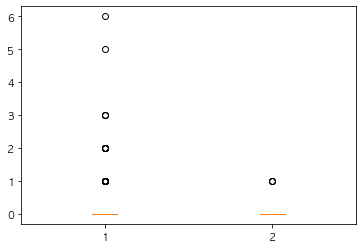

LeveneResult(statistic=39.33545415637824, pvalue=6.437478864913498e-10)


Ttest_indResult(statistic=6.172834188187051, pvalue=1.9162416671827876e-09)

In [50]:
x1 = np.array(violence_Y['공영주차장'])
x2 = np.array(violence_N['공영주차장'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['공영주차장']), np.array(violence_N['공영주차장'])))
scipy.stats.ttest_ind(np.array(violence_Y['공영주차장']), np.array(violence_N['공영주차장']), equal_var=False)

In [51]:
len(new_grid[new_grid['공영주차장']>0])

58

##### 공영주차장에서도 차이를 보인다 할 수 있으나, 주차장 자체가 많지 않다.

x1_mean :  0.9174311926605505 / x2_mean :  0.07100591715976332


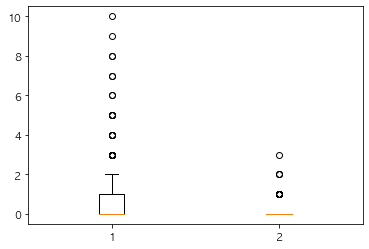

LeveneResult(statistic=95.22351662884729, pvalue=4.131028082442812e-21)


Ttest_indResult(statistic=9.610663675258598, pvalue=1.4207818664977127e-19)

In [52]:
x1 = np.array(violence_Y['공중화장실'])
x2 = np.array(violence_N['공중화장실'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['공중화장실']), np.array(violence_N['공중화장실'])))
scipy.stats.ttest_ind(np.array(violence_Y['공중화장실']), np.array(violence_N['공중화장실']), equal_var=False)

In [53]:
len(new_grid[new_grid['공중화장실']>0])

155

##### 공중화장실 수에서 유의한 차이를 보인다. 하지만 큰 차이가 있다고 보기 어려울 것 같다.   

x1_mean :  11.110091743119266 / x2_mean :  0.19230769230769232


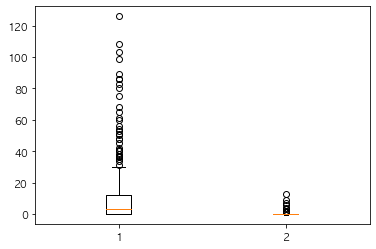

LeveneResult(statistic=103.96221185819266, pvalue=8.913816123324164e-23)


Ttest_indResult(statistic=9.954333310070798, pvalue=1.4329898674913547e-20)

In [54]:
x1 = np.array(violence_Y['교육시설'])
x2 = np.array(violence_N['교육시설'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['교육시설']), np.array(violence_N['교육시설'])))
scipy.stats.ttest_ind(np.array(violence_Y['교육시설']), np.array(violence_N['교육시설']), equal_var=False)

##### 교육시설 수에서 유의한 차이를 보인다. 

x1_mean :  0.1162079510703364 / x2_mean :  0.0


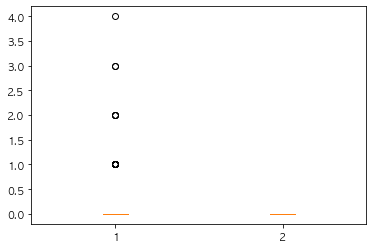

LeveneResult(statistic=22.689737680020258, pvalue=2.3401569438126636e-06)


Ttest_indResult(statistic=4.685104108084517, pvalue=4.115193155889773e-06)

In [55]:
x1 = np.array(violence_Y['대규모점포'])
x2 = np.array(violence_N['대규모점포'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['대규모점포']), np.array(violence_N['대규모점포'])))
scipy.stats.ttest_ind(np.array(violence_Y['대규모점포']), np.array(violence_N['대규모점포']), equal_var=False)

#### 폭력사건은 대규모 점포가 있는 격자에서만 발생했다.

x1_mean :  0.26299694189602446 / x2_mean :  0.0029585798816568047


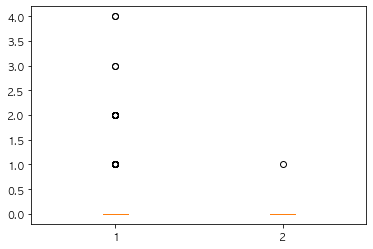

LeveneResult(statistic=55.44964764914733, pvalue=2.9931686151619643e-13)


Ttest_indResult(statistic=7.325836807710544, pvalue=1.8304419212339116e-12)

In [56]:
x1 = np.array(violence_Y['대부업현황'])
x2 = np.array(violence_N['대부업현황'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['대부업현황']), np.array(violence_N['대부업현황'])))
scipy.stats.ttest_ind(np.array(violence_Y['대부업현황']), np.array(violence_N['대부업현황']), equal_var=False)

x1_mean :  1.5535168195718654 / x2_mean :  0.1804733727810651


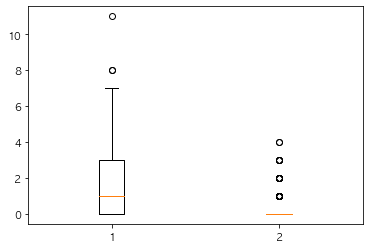

LeveneResult(statistic=225.03600000107716, pvalue=5.178519164811307e-44)


Ttest_indResult(statistic=12.913784711011541, pvalue=4.8608795153283524e-32)

In [57]:
x1 = np.array(violence_Y['버스정류장'])
x2 = np.array(violence_N['버스정류장'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['버스정류장']), np.array(violence_N['버스정류장'])))
scipy.stats.ttest_ind(np.array(violence_Y['버스정류장']), np.array(violence_N['버스정류장']), equal_var=False)

#### 비교적 버스정류장이 있는 곳에서 범죄가 발생했다

x1_mean :  25.99388379204893 / x2_mean :  4.952662721893491


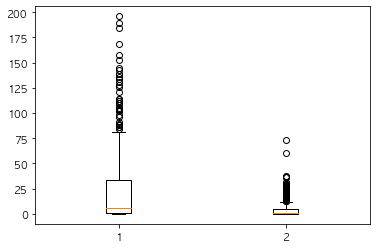

LeveneResult(statistic=86.67158581641867, pvalue=1.8477281330258574e-19)


Ttest_indResult(statistic=9.164157107385973, pvalue=3.9119428499329976e-18)

In [58]:
x1 = np.array(violence_Y['보안등'])
x2 = np.array(violence_N['보안등'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['보안등']), np.array(violence_N['보안등'])))
scipy.stats.ttest_ind(np.array(violence_Y['보안등']), np.array(violence_N['보안등']), equal_var=False)

#### 비교적 버스정류장이 있는 곳에서 범죄가 발생했다

x1_mean :  99.56269113149847 / x2_mean :  3.467455621301775


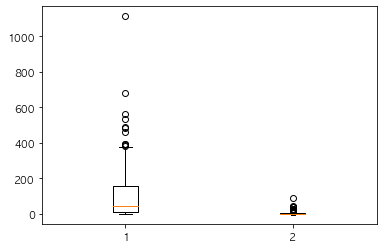

LeveneResult(statistic=187.942388191684, pvalue=7.700438244859686e-38)


Ttest_indResult(statistic=13.437243937418618, pvalue=4.200963922759733e-33)

In [59]:
x1 = np.array(violence_Y['상가'])
x2 = np.array(violence_N['상가'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['상가']), np.array(violence_N['상가'])))
scipy.stats.ttest_ind(np.array(violence_Y['상가']), np.array(violence_N['상가']), equal_var=False)

#### 상가수에는 꽤 큰 차이를 보인다

x1_mean :  1.2446483180428134 / x2_mean :  0.01775147928994083


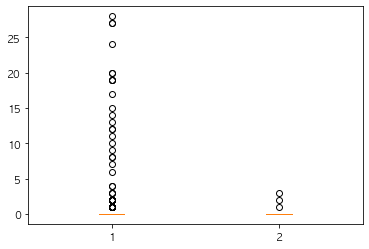

LeveneResult(statistic=27.57946148723188, pvalue=2.0335414224164232e-07)


Ttest_indResult(statistic=5.165704599173566, pvalue=4.170247241933739e-07)

In [60]:
x1 = np.array(violence_Y['숙박업소'])
x2 = np.array(violence_N['숙박업소'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['숙박업소']), np.array(violence_N['숙박업소'])))
scipy.stats.ttest_ind(np.array(violence_Y['숙박업소']), np.array(violence_N['숙박업소']), equal_var=False)

x1_mean :  4.26605504587156 / x2_mean :  0.07100591715976332


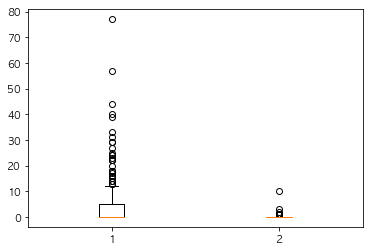

LeveneResult(statistic=79.17135575310421, pvalue=5.386126283025338e-18)


Ttest_indResult(statistic=8.753000322514072, pvalue=1.1050034978191613e-16)

In [61]:
x1 = np.array(violence_Y['술집'])
x2 = np.array(violence_N['술집'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['술집']), np.array(violence_N['술집'])))
scipy.stats.ttest_ind(np.array(violence_Y['술집']), np.array(violence_N['술집']), equal_var=False)

x1_mean :  0.6819571865443425 / x2_mean :  0.06804733727810651


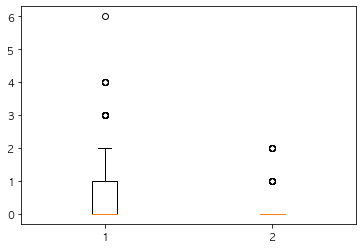

LeveneResult(statistic=108.05107574234006, pvalue=1.5048693495683113e-23)


Ttest_indResult(statistic=10.25431288687245, pvalue=5.455897456785749e-22)

In [62]:
x1 = np.array(violence_Y['어린이보호'])
x2 = np.array(violence_N['어린이보호'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['어린이보호']), np.array(violence_N['어린이보호'])))
scipy.stats.ttest_ind(np.array(violence_Y['어린이보호']), np.array(violence_N['어린이보호']), equal_var=False)

x1_mean :  1.782874617737003 / x2_mean :  0.07100591715976332


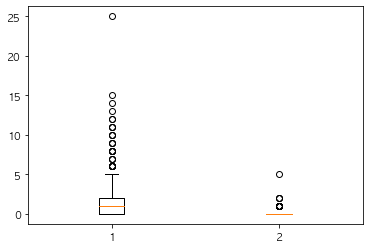

LeveneResult(statistic=140.95951037250566, pvalue=1.2962089806239312e-29)


Ttest_indResult(statistic=10.206588416383983, pvalue=1.751944458740408e-21)

In [63]:
x1 = np.array(violence_Y['어린이집'])
x2 = np.array(violence_N['어린이집'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['어린이집']), np.array(violence_N['어린이집'])))
scipy.stats.ttest_ind(np.array(violence_Y['어린이집']), np.array(violence_N['어린이집']), equal_var=False)

x1_mean :  2.5015290519877675 / x2_mean :  0.023668639053254437


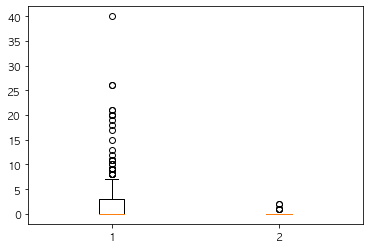

LeveneResult(statistic=87.91637817490702, pvalue=1.0595326506610007e-19)


Ttest_indResult(statistic=9.22275715846555, pvalue=3.6729270527685436e-18)

In [64]:
x1 = np.array(violence_Y['오락시설'])
x2 = np.array(violence_N['오락시설'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['오락시설']), np.array(violence_N['오락시설'])))
scipy.stats.ttest_ind(np.array(violence_Y['오락시설']), np.array(violence_N['오락시설']), equal_var=False)

x1_mean :  26.192660550458715 / x2_mean :  0.5


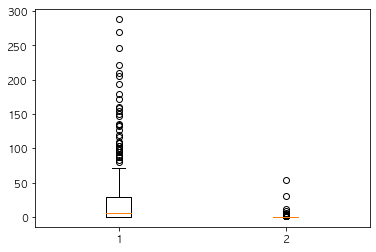

LeveneResult(statistic=101.45944665702352, pvalue=2.661439426123149e-22)


Ttest_indResult(statistic=9.853511415791722, pvalue=3.035624797498154e-20)

In [65]:
x1 = np.array(violence_Y['원룸_오피스텔'])
x2 = np.array(violence_N['원룸_오피스텔'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['원룸_오피스텔']), np.array(violence_N['원룸_오피스텔'])))
scipy.stats.ttest_ind(np.array(violence_Y['원룸_오피스텔']), np.array(violence_N['원룸_오피스텔']), equal_var=False)

x1_mean :  35.25076452599389 / x2_mean :  1.2100591715976332


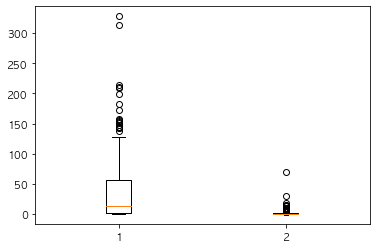

LeveneResult(statistic=160.7529343943321, pvalue=3.874565738523838e-33)


Ttest_indResult(statistic=12.308182602887845, pvalue=6.295480022808122e-29)

In [66]:
x1 = np.array(violence_Y['음식점'])
x2 = np.array(violence_N['음식점'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['음식점']), np.array(violence_N['음식점'])))
scipy.stats.ttest_ind(np.array(violence_Y['음식점']), np.array(violence_N['음식점']), equal_var=False)

x1_mean :  0.1437308868501529 / x2_mean :  0.0029585798816568047


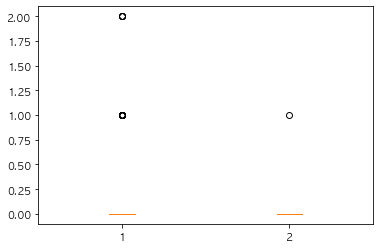

LeveneResult(statistic=44.34634632806103, pvalue=5.778646437874186e-11)


Ttest_indResult(statistic=6.5541375042076595, pvalue=2.0870834306577782e-10)

In [67]:
x1 = np.array(violence_Y['자율방범대'])
x2 = np.array(violence_N['자율방범대'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['자율방범대']), np.array(violence_N['자율방범대'])))
scipy.stats.ttest_ind(np.array(violence_Y['자율방범대']), np.array(violence_N['자율방범대']), equal_var=False)

x1_mean :  0.0581039755351682 / x2_mean :  0.0


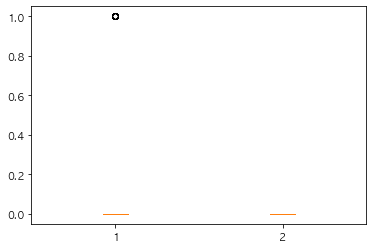

LeveneResult(statistic=20.78794063079778, pvalue=6.1103808745281545e-06)


Ttest_indResult(statistic=4.484460905213648, pvalue=1.014071890798578e-05)

In [68]:
x1 = np.array(violence_Y['파출소'])
x2 = np.array(violence_N['파출소'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['파출소']), np.array(violence_N['파출소'])))
scipy.stats.ttest_ind(np.array(violence_Y['파출소']), np.array(violence_N['파출소']), equal_var=False)

x1_mean :  3.764525993883792 / x2_mean :  0.3343195266272189


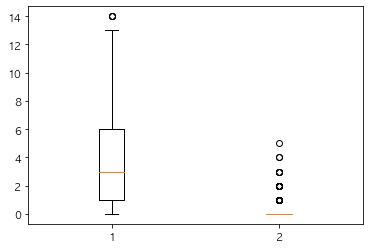

LeveneResult(statistic=371.81763788046055, pvalue=4.1353012295730933e-66)


Ttest_indResult(statistic=16.436993794804714, pvalue=2.0788893130041577e-45)

In [69]:
x1 = np.array(violence_Y['cctv'])
x2 = np.array(violence_N['cctv'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['cctv']), np.array(violence_N['cctv'])))
scipy.stats.ttest_ind(np.array(violence_Y['cctv']), np.array(violence_N['cctv']), equal_var=False)

x1_mean :  9.889908256880734 / x2_mean :  1.680473372781065


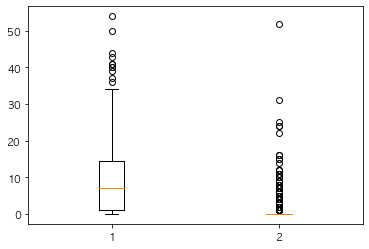

LeveneResult(statistic=168.6234013592202, pvalue=1.6256461949200052e-34)


Ttest_indResult(statistic=12.687377582627517, pvalue=7.990619373591032e-32)

In [70]:
x1 = np.array(violence_Y['신호등'])
x2 = np.array(violence_N['신호등'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['신호등']), np.array(violence_N['신호등'])))
scipy.stats.ttest_ind(np.array(violence_Y['신호등']), np.array(violence_N['신호등']), equal_var=False)

x1_mean :  18.856269113149846 / x2_mean :  2.088757396449704


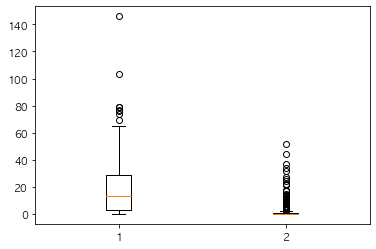

LeveneResult(statistic=207.77305352377775, pvalue=3.575618952555342e-41)


Ttest_indResult(statistic=14.593026337005181, pvalue=9.921774730806831e-39)

In [71]:
x1 = np.array(violence_Y['횡단보도'])
x2 = np.array(violence_N['횡단보도'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['횡단보도']), np.array(violence_N['횡단보도'])))
scipy.stats.ttest_ind(np.array(violence_Y['횡단보도']), np.array(violence_N['횡단보도']), equal_var=False)

In [72]:
numerical_feats = new_grid.dtypes[new_grid.dtypes != "object"].index.tolist()
numerical_feats.remove('GRADE_폭력')
numerical_feats.remove('GRADE_절도')
numerical_feats.remove('GRADE_성폭력')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = new_grid.dtypes[new_grid.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  31
Number of Categorical features:  2


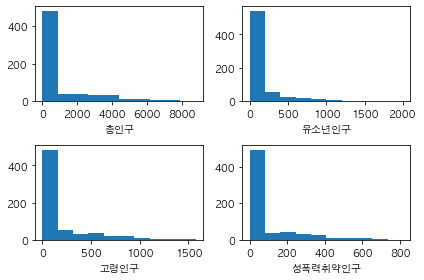

In [73]:
plt.subplot(221)
plt.hist(new_grid['총인구'])
plt.xlabel('총인구')

plt.subplot(222)
plt.hist(new_grid['유소년인구'])
plt.xlabel('유소년인구')

plt.subplot(223)
plt.hist(new_grid['고령인구'])
plt.xlabel('고령인구')

plt.subplot(224)
plt.hist(new_grid['성폭력취약인구'])
plt.xlabel('성폭력취약인구')

plt.tight_layout()
plt.show()

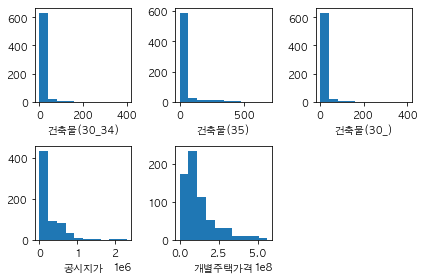

In [74]:
plt.subplot(231)
plt.hist(new_grid['건축물(30_34)'])
plt.xlabel('건축물(30_34)')

plt.subplot(232)
plt.hist(new_grid['건축물(35)'])
plt.xlabel('건축물(35)')

plt.subplot(233)
plt.hist(new_grid['건축물(30_34)'])
plt.xlabel('건축물(30_)')

plt.subplot(234)
plt.hist(new_grid['공시지가'])
plt.xlabel('공시지가')

plt.subplot(235)
plt.hist(new_grid['개별주택가격'])
plt.xlabel('개별주택가격')

plt.tight_layout()
plt.show()

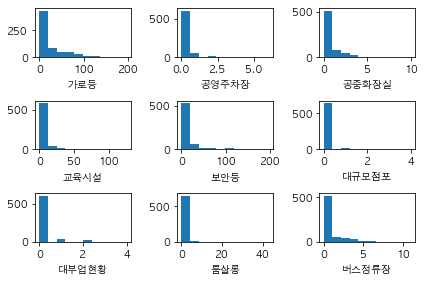

In [75]:
plt.subplot(331)
plt.hist(new_grid['가로등'])
plt.xlabel('가로등')

plt.subplot(332)
plt.hist(new_grid['공영주차장'])
plt.xlabel('공영주차장')

plt.subplot(333)
plt.hist(new_grid['공중화장실'])
plt.xlabel('공중화장실')

plt.subplot(334)
plt.hist(new_grid['교육시설'])
plt.xlabel('교육시설')

plt.subplot(335)
plt.hist(new_grid['보안등'])
plt.xlabel('보안등')

plt.subplot(336)
plt.hist(new_grid['대규모점포'])
plt.xlabel('대규모점포')

plt.subplot(337)
plt.hist(new_grid['대부업현황'])
plt.xlabel('대부업현황')

plt.subplot(338)
plt.hist(new_grid['룸살롱'])
plt.xlabel('룸살롱')

plt.subplot(339)
plt.hist(new_grid['버스정류장'])
plt.xlabel('버스정류장')

plt.tight_layout()
plt.show()

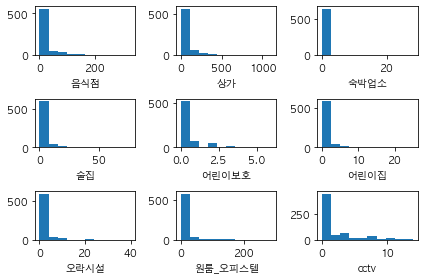

In [76]:
plt.subplot(331)
plt.hist(new_grid['음식점'])
plt.xlabel('음식점')

plt.subplot(332)
plt.hist(new_grid['상가'])
plt.xlabel('상가')

plt.subplot(333)
plt.hist(new_grid['숙박업소'])
plt.xlabel('숙박업소')

plt.subplot(334)
plt.hist(new_grid['술집'])
plt.xlabel('술집')

plt.subplot(335)
plt.hist(new_grid['어린이보호'])
plt.xlabel('어린이보호')

plt.subplot(336)
plt.hist(new_grid['어린이집'])
plt.xlabel('어린이집')

plt.subplot(337)
plt.hist(new_grid['오락시설'])
plt.xlabel('오락시설')

plt.subplot(338)
plt.hist(new_grid['원룸_오피스텔'])
plt.xlabel('원룸_오피스텔')

plt.subplot(339)
plt.hist(new_grid['cctv'])
plt.xlabel('cctv')

plt.tight_layout()
plt.show()

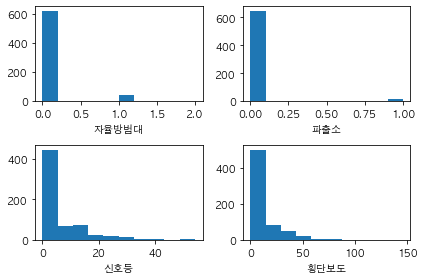

In [77]:
plt.subplot(221)
plt.hist(new_grid['자율방범대'])
plt.xlabel('자율방범대')

plt.subplot(222)
plt.hist(new_grid['파출소'])
plt.xlabel('파출소')

plt.subplot(223)
plt.hist(new_grid['신호등'])
plt.xlabel('신호등')

plt.subplot(224)
plt.hist(new_grid['횡단보도'])
plt.xlabel('횡단보도')

plt.tight_layout()
plt.show()

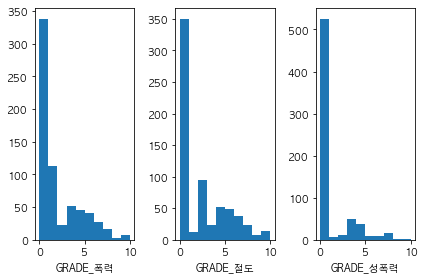

In [78]:
plt.subplot(131)
plt.hist(new_grid['GRADE_폭력'])
plt.xlabel('GRADE_폭력')

plt.subplot(132)
plt.hist(new_grid['GRADE_절도'])
plt.xlabel('GRADE_절도')

plt.subplot(133)
plt.hist(new_grid['GRADE_성폭력'])
plt.xlabel('GRADE_성폭력')

plt.tight_layout()
plt.show()

In [79]:
feature_list = list(new_grid.drop(columns = ['행정동코드','ID','GRADE_절도','GRADE_성폭력','GRADE_폭력']).columns)
feature = new_grid[feature_list]
target = new_grid[['GRADE_폭력']]

In [80]:
# for b0, 상수항 추가
X = sm.add_constant(feature, has_constant = "add")
y = target
# OLS 검정
multi_model = sm.OLS(y, X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GRADE_폭력   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     56.54
Date:                Fri, 20 Aug 2021   Prob (F-statistic):          1.22e-157
Time:                        01:21:17   Log-Likelihood:                -1048.2
No. Observations:                 665   AIC:                             2158.
Df Residuals:                     634   BIC:                             2298.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1090      0.081      1.348      0.178      -0.050       0.268
총인구            0.0025      0.001      4.471      0.000       0.001       0.004
유소년인구         -0.0063      0.001     -4.175      0.000      -0.009      -0.003
고령인구          -0.0016      0.001     -1.396      0.163      -0.004       0.001
건축물(30_34)    -0.0019      0.002     -1.287      0.198      -0.005       0.001
건축물(35)        0.0026      0.001      2.687      0.007       0.001       0.004
개별주택가격       3.15e-09   5.94e-10      5.302      0.000    1.98e-09    4.32e-09
공시지가        2.805e-07   3.37e-07      0.831      0.406   -3.82e-07    9.43e-07
가로등            0.0084      0.003      3.147      0.002       0.003       0.014
공영주차장          0.1387      0.127      1.094      0.274      -0.110       0.388
공중화장실          0.0554      0.051      1.079      0.281      -0.045       0.156
교육시설       -2.672e-05      0.007     -0.004      0.997      -0.014       0.014
대규모점포         -0.3266      0.205     -1.590      0.112      -0.730       0.077
대부업현황         -0.0100      0.126     -0.079      0.937      -0.258       0.238
룸살롱            0.0657      0.024      2.747      0.006       0.019       0.113
버스정류장          0.0690      0.054      1.283      0.200      -0.037       0.175
보안등           -0.0188      0.002     -9.067      0.000      -0.023      -0.015
상가             0.0001      0.001      0.084      0.933      -0.003       0.003
숙박업소           0.0056      0.023      0.238      0.812      -0.040       0.051
술집             0.0542      0.024      2.291      0.022       0.008       0.101
어린이보호          0.1307      0.080      1.640      0.101      -0.026       0.287
어린이집          -0.0590      0.040     -1.459      0.145      -0.138       0.020
오락시설           0.0321      0.029      1.095      0.274      -0.025       0.090
원룸_오피스텔       -0.0014      0.002     -0.640      0.522      -0.006       0.003
음식점           -0.0024      0.006     -0.421      0.674      -0.013       0.009
자율방범대         -0.0011      0.208     -0.005      0.996      -0.409       0.407
파출소            0.2442      0.318      0.768      0.443      -0.380       0.868
cctv           0.1344      0.034      3.919      0.000       0.067       0.202
신호등           -0.0178      0.010     -1.733      0.084      -0.038       0.002
횡단보도           0.0165      0.005      3.093      0.002       0.006       0.027
성폭력취약인구       -0.0121      0.003     -4.166      0.000      -0.018      -0.006
건축물(30_)       0.0006      0.001      0.819      0.413      -0.001       0.002
==============================================================================
Omnibus:                      170.906   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.887
Skew:                           1.298   Prob(JB):                     2.48e-97
Ku

In [81]:
#다중공선성확인
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])]
vif["features"] = feature.columns 
vif

,VIF Factor,features
0,552.776126,총인구
1,75.742201,유소년인구
2,66.310189,고령인구
3,inf,건축물(30_34)
4,inf,건축물(35)
5,2.753326,개별주택가격
6,8.620529,공시지가
7,5.356222,가로등
8,1.808705,공영주차장
9,2.006783,공중화장실


In [82]:
# 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가된다.
# 다중 선형회귀분석

X = sm.add_constant(feature, has_constant = "add")
y = target

def processSubset(X,y):
    model = sm.OLS(y,X) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}
    
processSubset(X = X, y = target)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fea103aa640>,
 'AIC': 2158.443777964348}

In [83]:
X = feature
y = target

selected_variables = [] ## 선택된 변수들

sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(feature) > 0:
    remainder = list(set(feature) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = feature[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(target,sm.add_constant(feature[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [84]:
selected_variables

['음식점',
 '고령인구',
 '횡단보도',
 '보안등',
 'cctv',
 '룸살롱',
 '개별주택가격',
 '건축물(35)',
 '대규모점포',
 '가로등',
 '술집',
 '성폭력취약인구']

In [85]:
# 다중 선형회귀분석
x_data = new_grid[selected_variables]
y = target

# for b0, 상수항 추가
X = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y, X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GRADE_폭력   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     135.1
Date:                Fri, 20 Aug 2021   Prob (F-statistic):          9.48e-168
Time:                        01:21:19   Log-Likelihood:                -1065.8
No. Observations:                 665   AIC:                             2158.
Df Residuals:                     652   BIC:                             2216.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1572      0.077      2.046      0.041       0.006       0.308
음식점            0.0039      0.004      1.042      0.298      -0.003       0.011
고령인구           0.0032      0.000      8.579      0.000       0.002       0.004
횡단보도           0.0184      0.005      4.039      0.000       0.009       0.027
보안등           -0.0181      0.002     -8.986      0.000      -0.022      -0.014
cctv           0.1315      0.028      4.666      0.000       0.076       0.187
룸살롱            0.0673      0.020      3.400      0.001       0.028       0.106
개별주택가격      3.166e-09   5.67e-10      5.587      0.000    2.05e-09    4.28e-09
건축물(35)        0.0026      0.001      3.208      0.001       0.001       0.004
대규모점포         -0.4299      0.170     -2.529      0.012      -0.764      -0.096
가로등            0.0084      0.002      3.716      0.000       0.004       0.013
술집             0.0585      0.020      2.905      0.004       0.019       0.098
성폭력취약인구       -0.0015      0.001     -2.002      0.046      -0.003   -2.78e-05
==============================================================================
Omnibus:                      162.313   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.630
Skew:                           1.239   Prob(JB):                     5.59e-91
Kurtosis:                       5.976   Cond. No.                     5.84e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

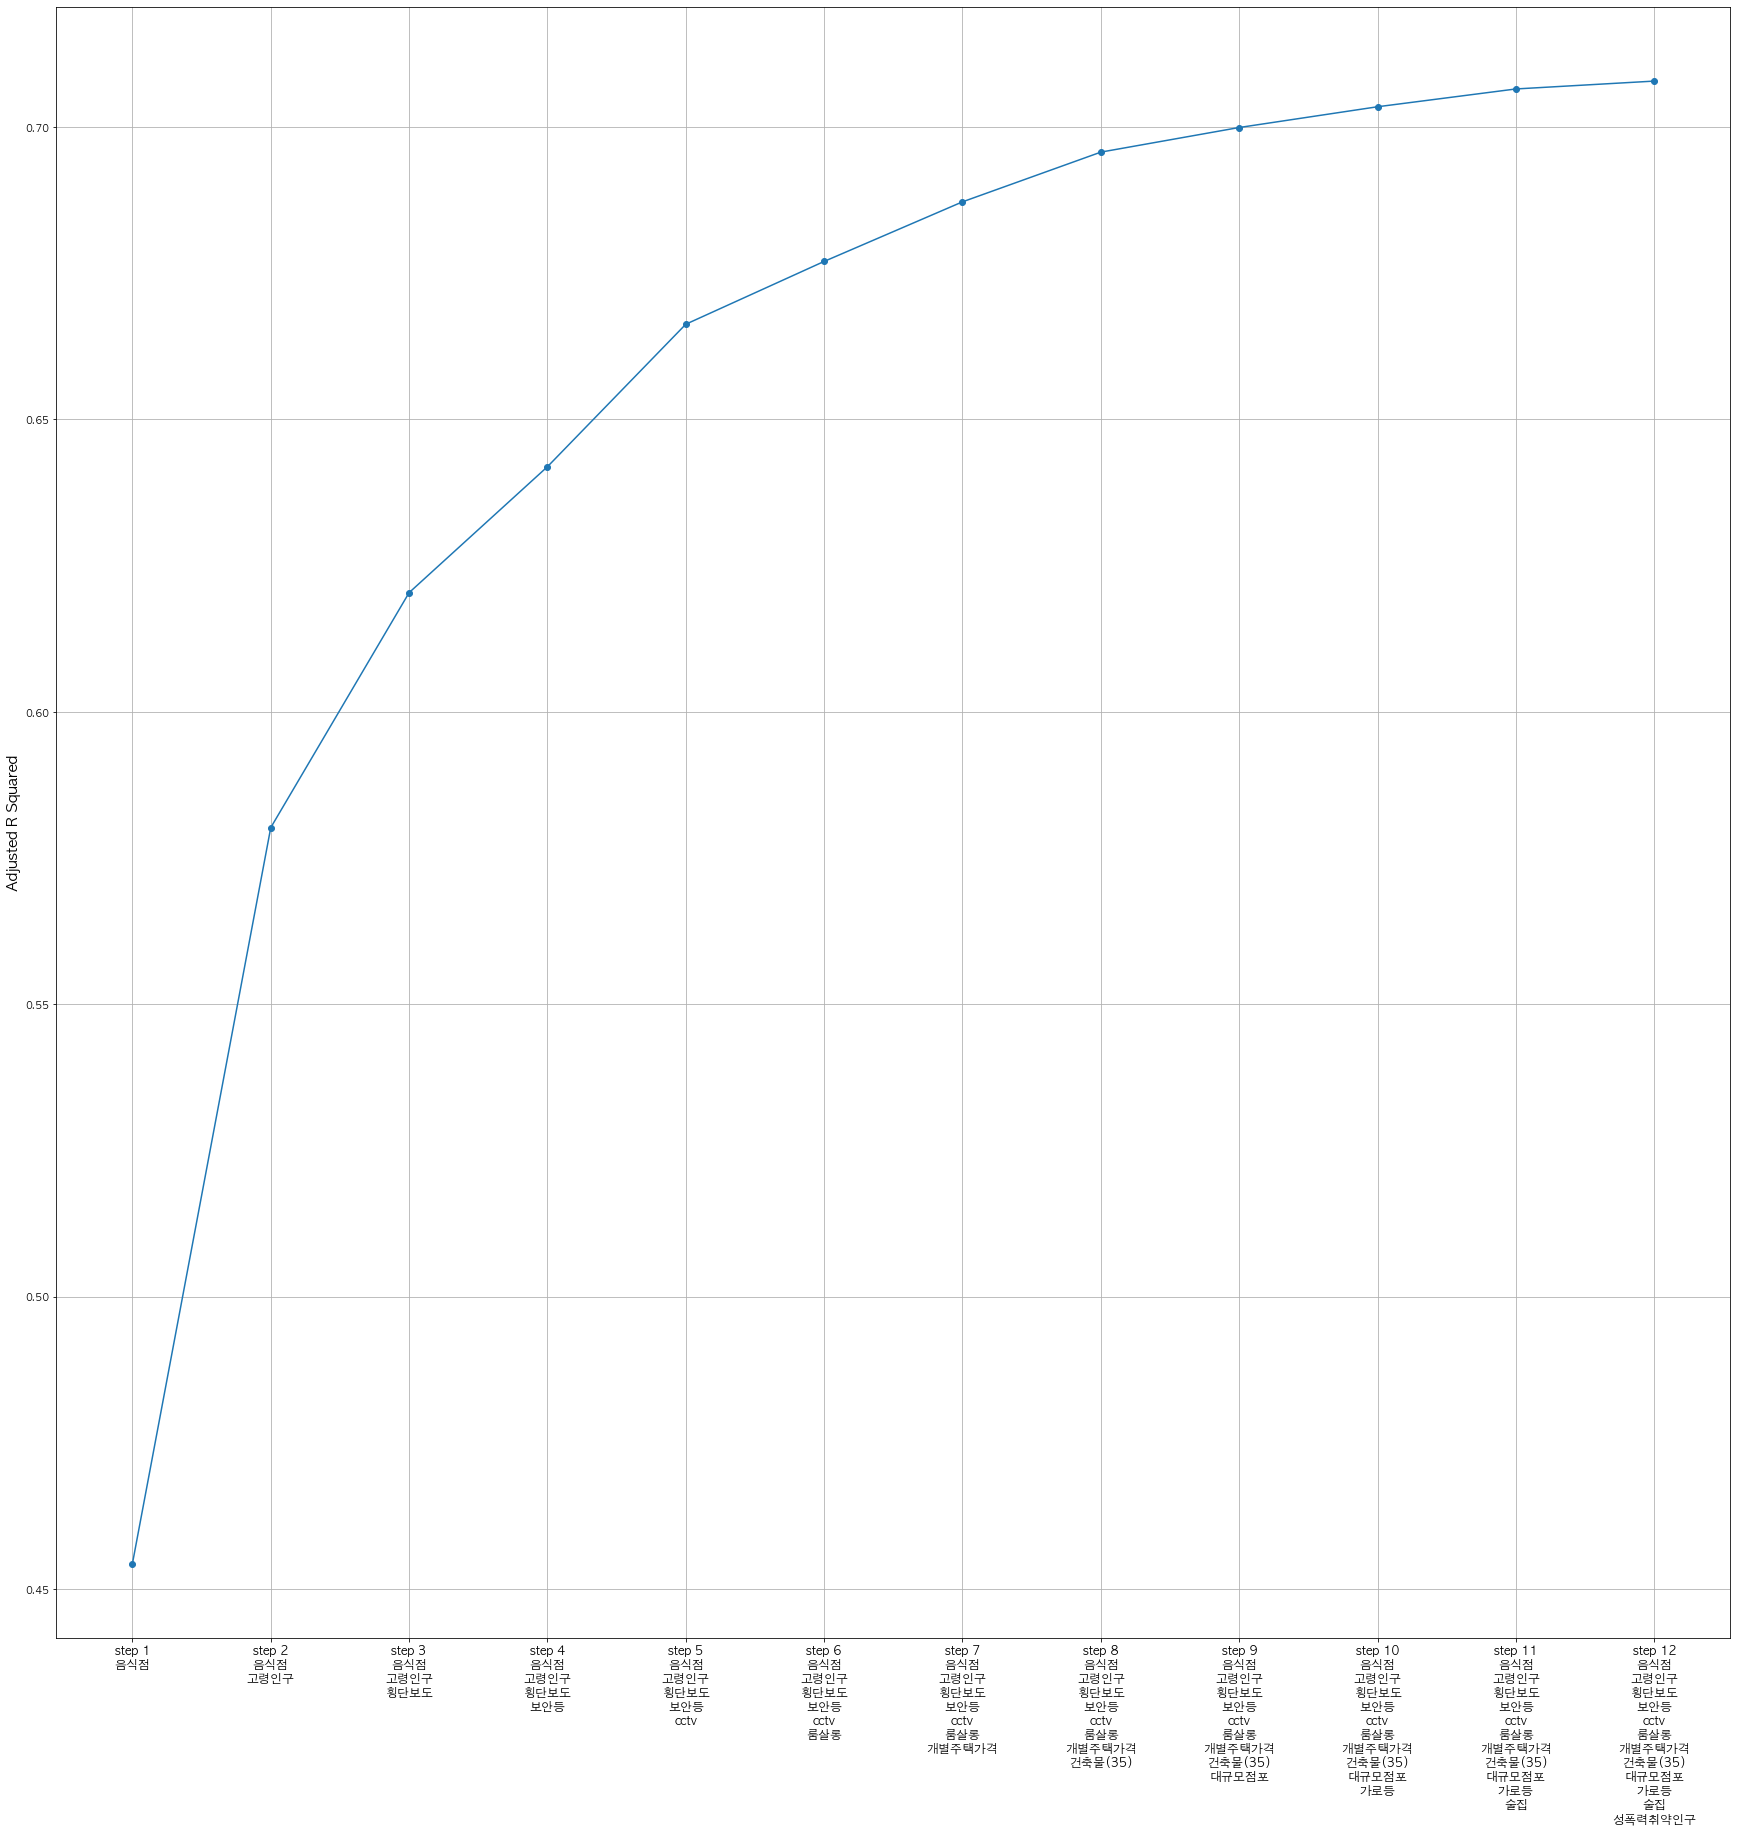

In [86]:
fig = plt.figure(figsize=(30,30))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [87]:
## 후진 소거법
y = target

selected_variables = feature.columns.tolist()

sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(new_grid[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(feature[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [88]:
selected_variables

['총인구',
 '유소년인구',
 '건축물(35)',
 '개별주택가격',
 '가로등',
 '룸살롱',
 '보안등',
 '술집',
 'cctv',
 '횡단보도',
 '성폭력취약인구']

In [89]:
# 다중 선형회귀분석
x_data = new_grid[selected_variables]
y = target

# for b0, 상수항 추가
X = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y, X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GRADE_폭력   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     152.3
Date:                Fri, 20 Aug 2021   Prob (F-statistic):          4.99e-172
Time:                        01:21:20   Log-Likelihood:                -1058.3
No. Observations:                 665   AIC:                             2141.
Df Residuals:                     653   BIC:                             2195.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1367      0.076      1.790      0.074      -0.013       0.287
총인구            0.0018      0.000      9.784      0.000       0.001       0.002
유소년인구         -0.0046      0.001     -7.961      0.000      -0.006      -0.003
건축물(35)        0.0030      0.001      3.956      0.000       0.002       0.005
개별주택가격      3.162e-09   5.56e-10      5.683      0.000    2.07e-09    4.26e-09
가로등            0.0090      0.002      4.191      0.000       0.005       0.013
룸살롱            0.0570      0.019      3.043      0.002       0.020       0.094
보안등           -0.0187      0.002     -9.505      0.000      -0.023      -0.015
술집             0.0732      0.011      6.869      0.000       0.052       0.094
cctv           0.1311      0.028      4.714      0.000       0.076       0.186
횡단보도           0.0165      0.004      3.705      0.000       0.008       0.025
성폭력취약인구       -0.0106      0.002     -5.924      0.000      -0.014      -0.007
==============================================================================
Omnibus:                      171.004   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.533
Skew:                           1.291   Prob(JB):                     3.29e-99
Kurtosis:                       6.115   Cond. No.                     2.65e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

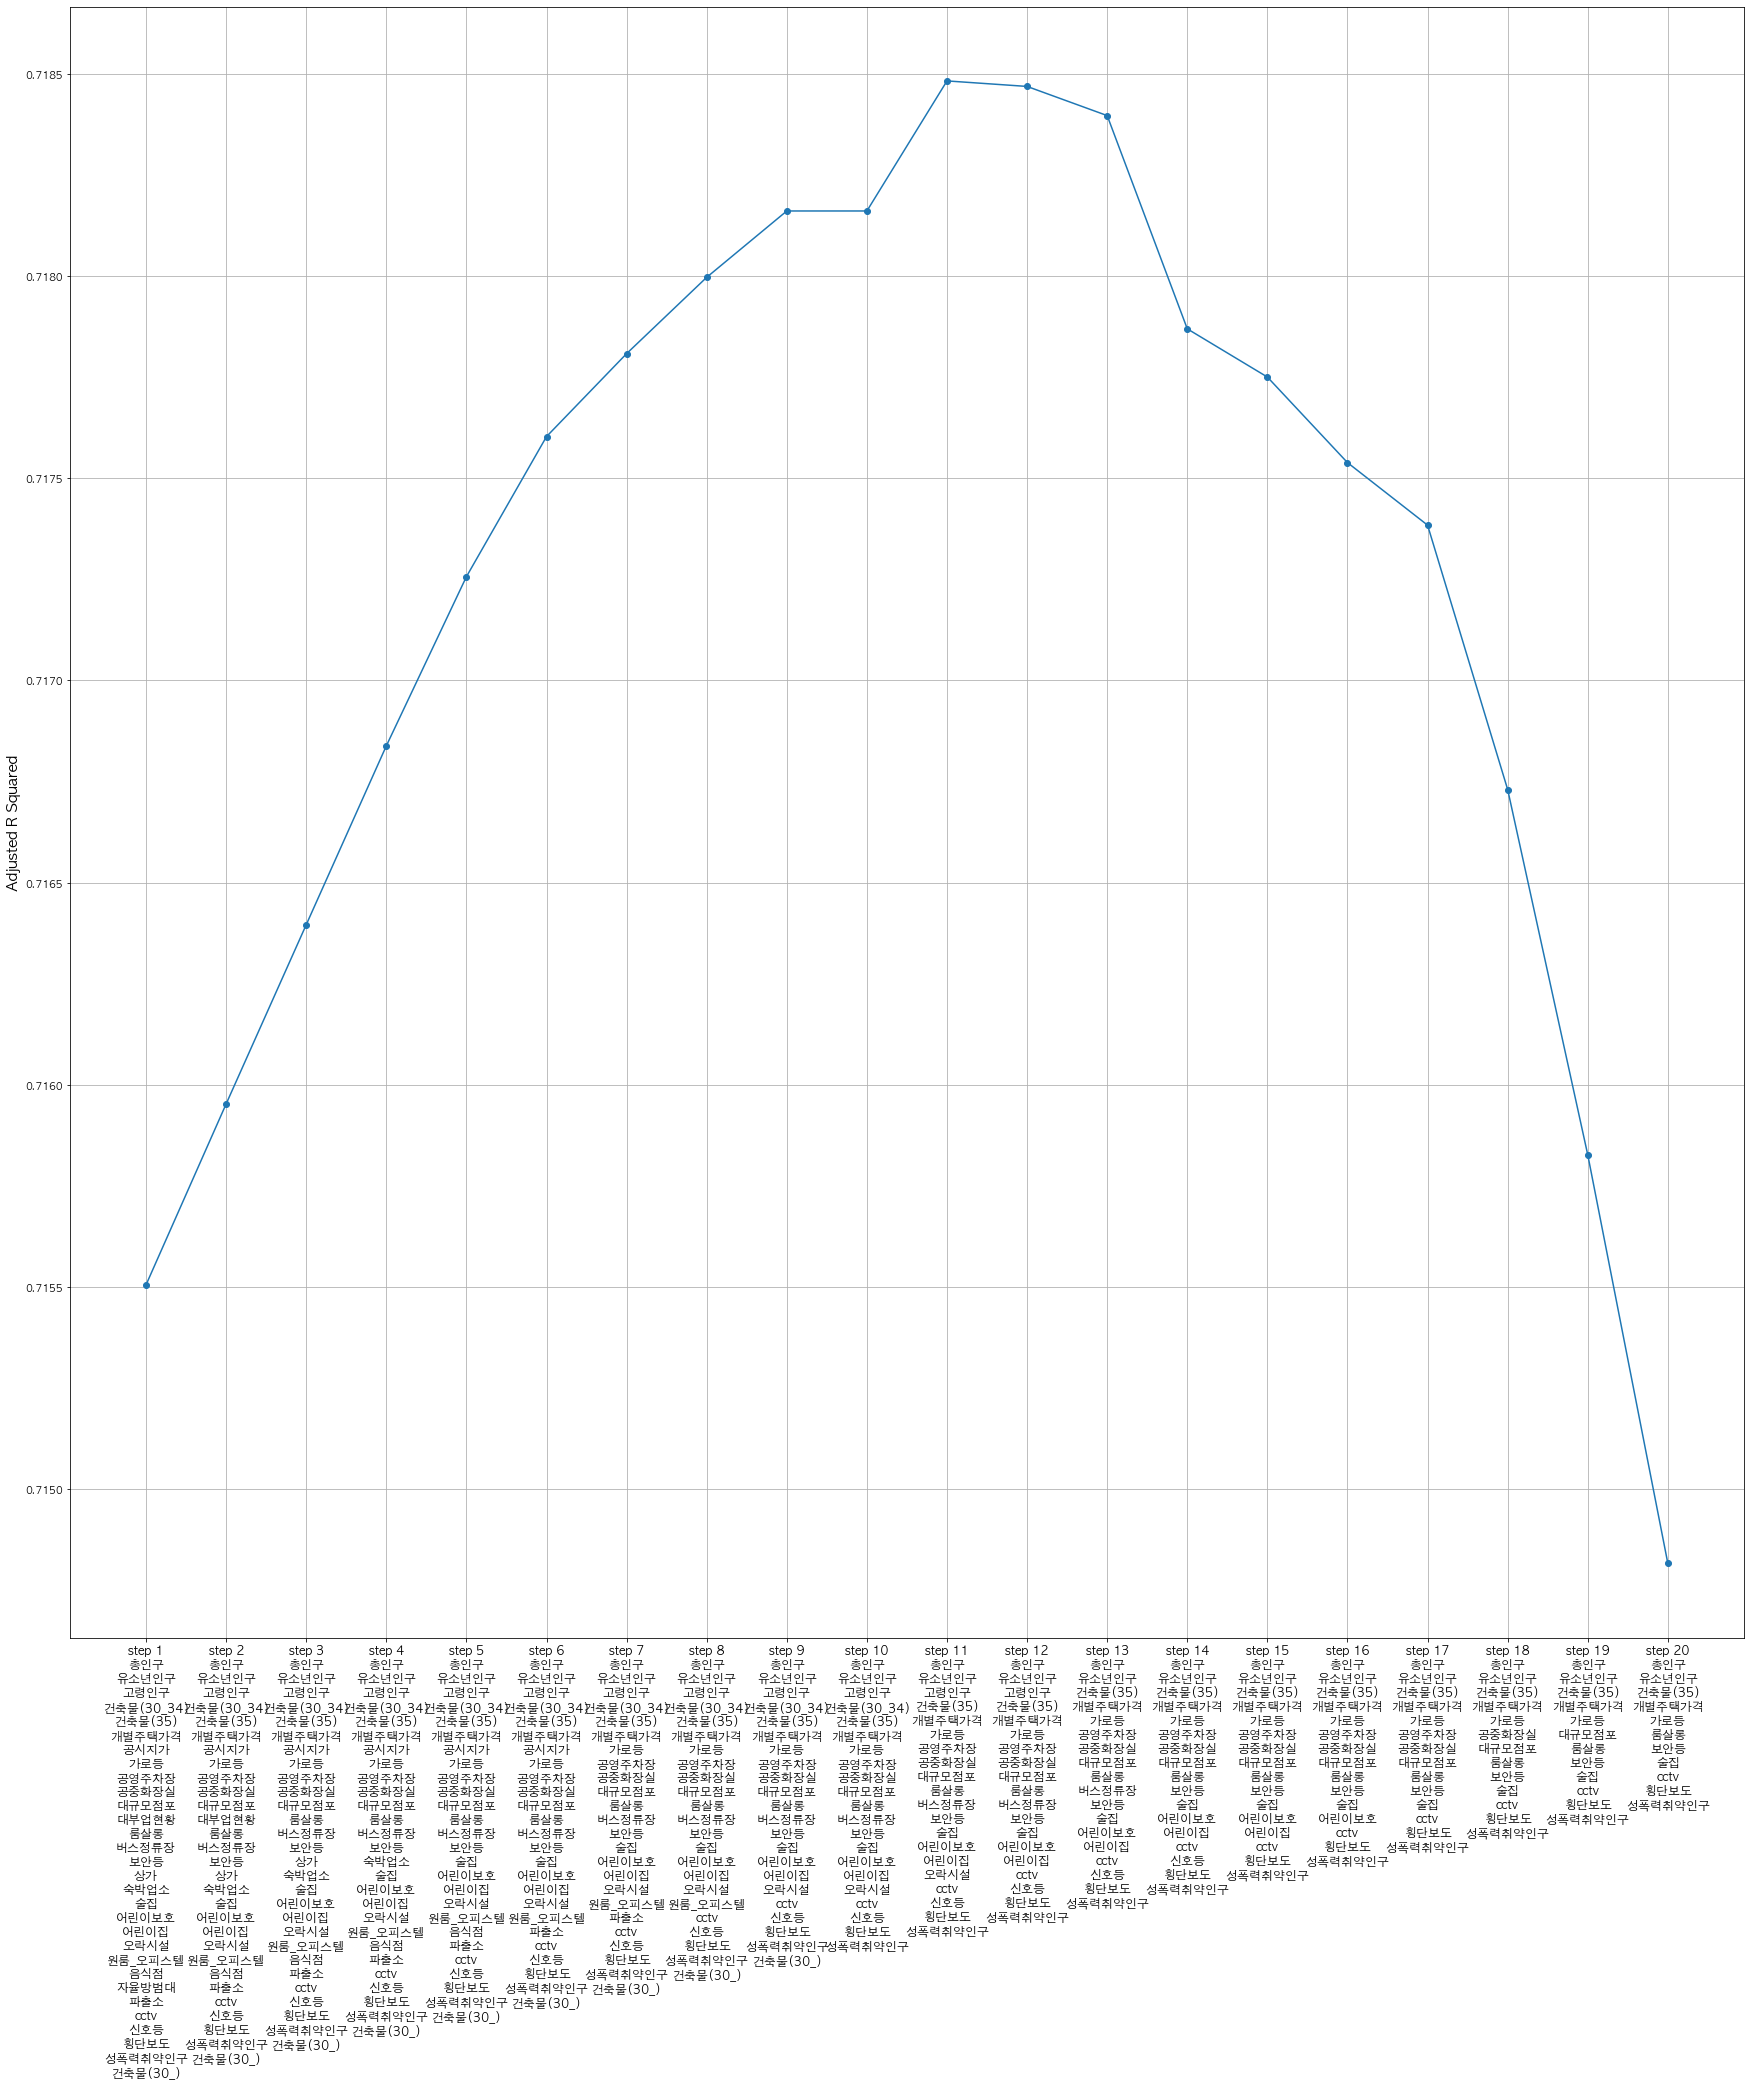

In [90]:
fig = plt.figure(figsize=(30,30))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [91]:
## 전진 단계별 선택법

variables = feature.columns.tolist() ## 설명 변수 리스트
 
y = target  ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = new_grid[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = new_grid[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(target,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(new_grid[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [92]:
# 다중 선형회귀분석
x_data = new_grid[selected_variables]
y = target

# for b0, 상수항 추가
X = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y, X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GRADE_폭력   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     147.3
Date:                Fri, 20 Aug 2021   Prob (F-statistic):          1.25e-168
Time:                        01:21:23   Log-Likelihood:                -1066.3
No. Observations:                 665   AIC:                             2157.
Df Residuals:                     653   BIC:                             2211.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1659      0.075      2.198      0.028       0.018       0.314
고령인구           0.0027      0.000     11.121      0.000       0.002       0.003
횡단보도           0.0179      0.004      4.062      0.000       0.009       0.027
보안등           -0.0172      0.002     -8.798      0.000      -0.021      -0.013
cctv           0.1125      0.028      4.010      0.000       0.057       0.168
룸살롱            0.0677      0.019      3.546      0.000       0.030       0.105
개별주택가격      2.989e-09   5.47e-10      5.464      0.000    1.92e-09    4.06e-09
건축물(35)        0.0032      0.001      4.331      0.000       0.002       0.005
대규모점포         -0.3942      0.161     -2.446      0.015      -0.711      -0.078
가로등            0.0076      0.002      3.570      0.000       0.003       0.012
술집             0.0719      0.011      6.778      0.000       0.051       0.093
공중화장실          0.0930      0.046      2.020      0.044       0.003       0.183
==============================================================================
Omnibus:                      159.493   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.684
Skew:                           1.216   Prob(JB):                     1.09e-89
Kurtosis:                       5.978   Cond. No.                     5.53e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

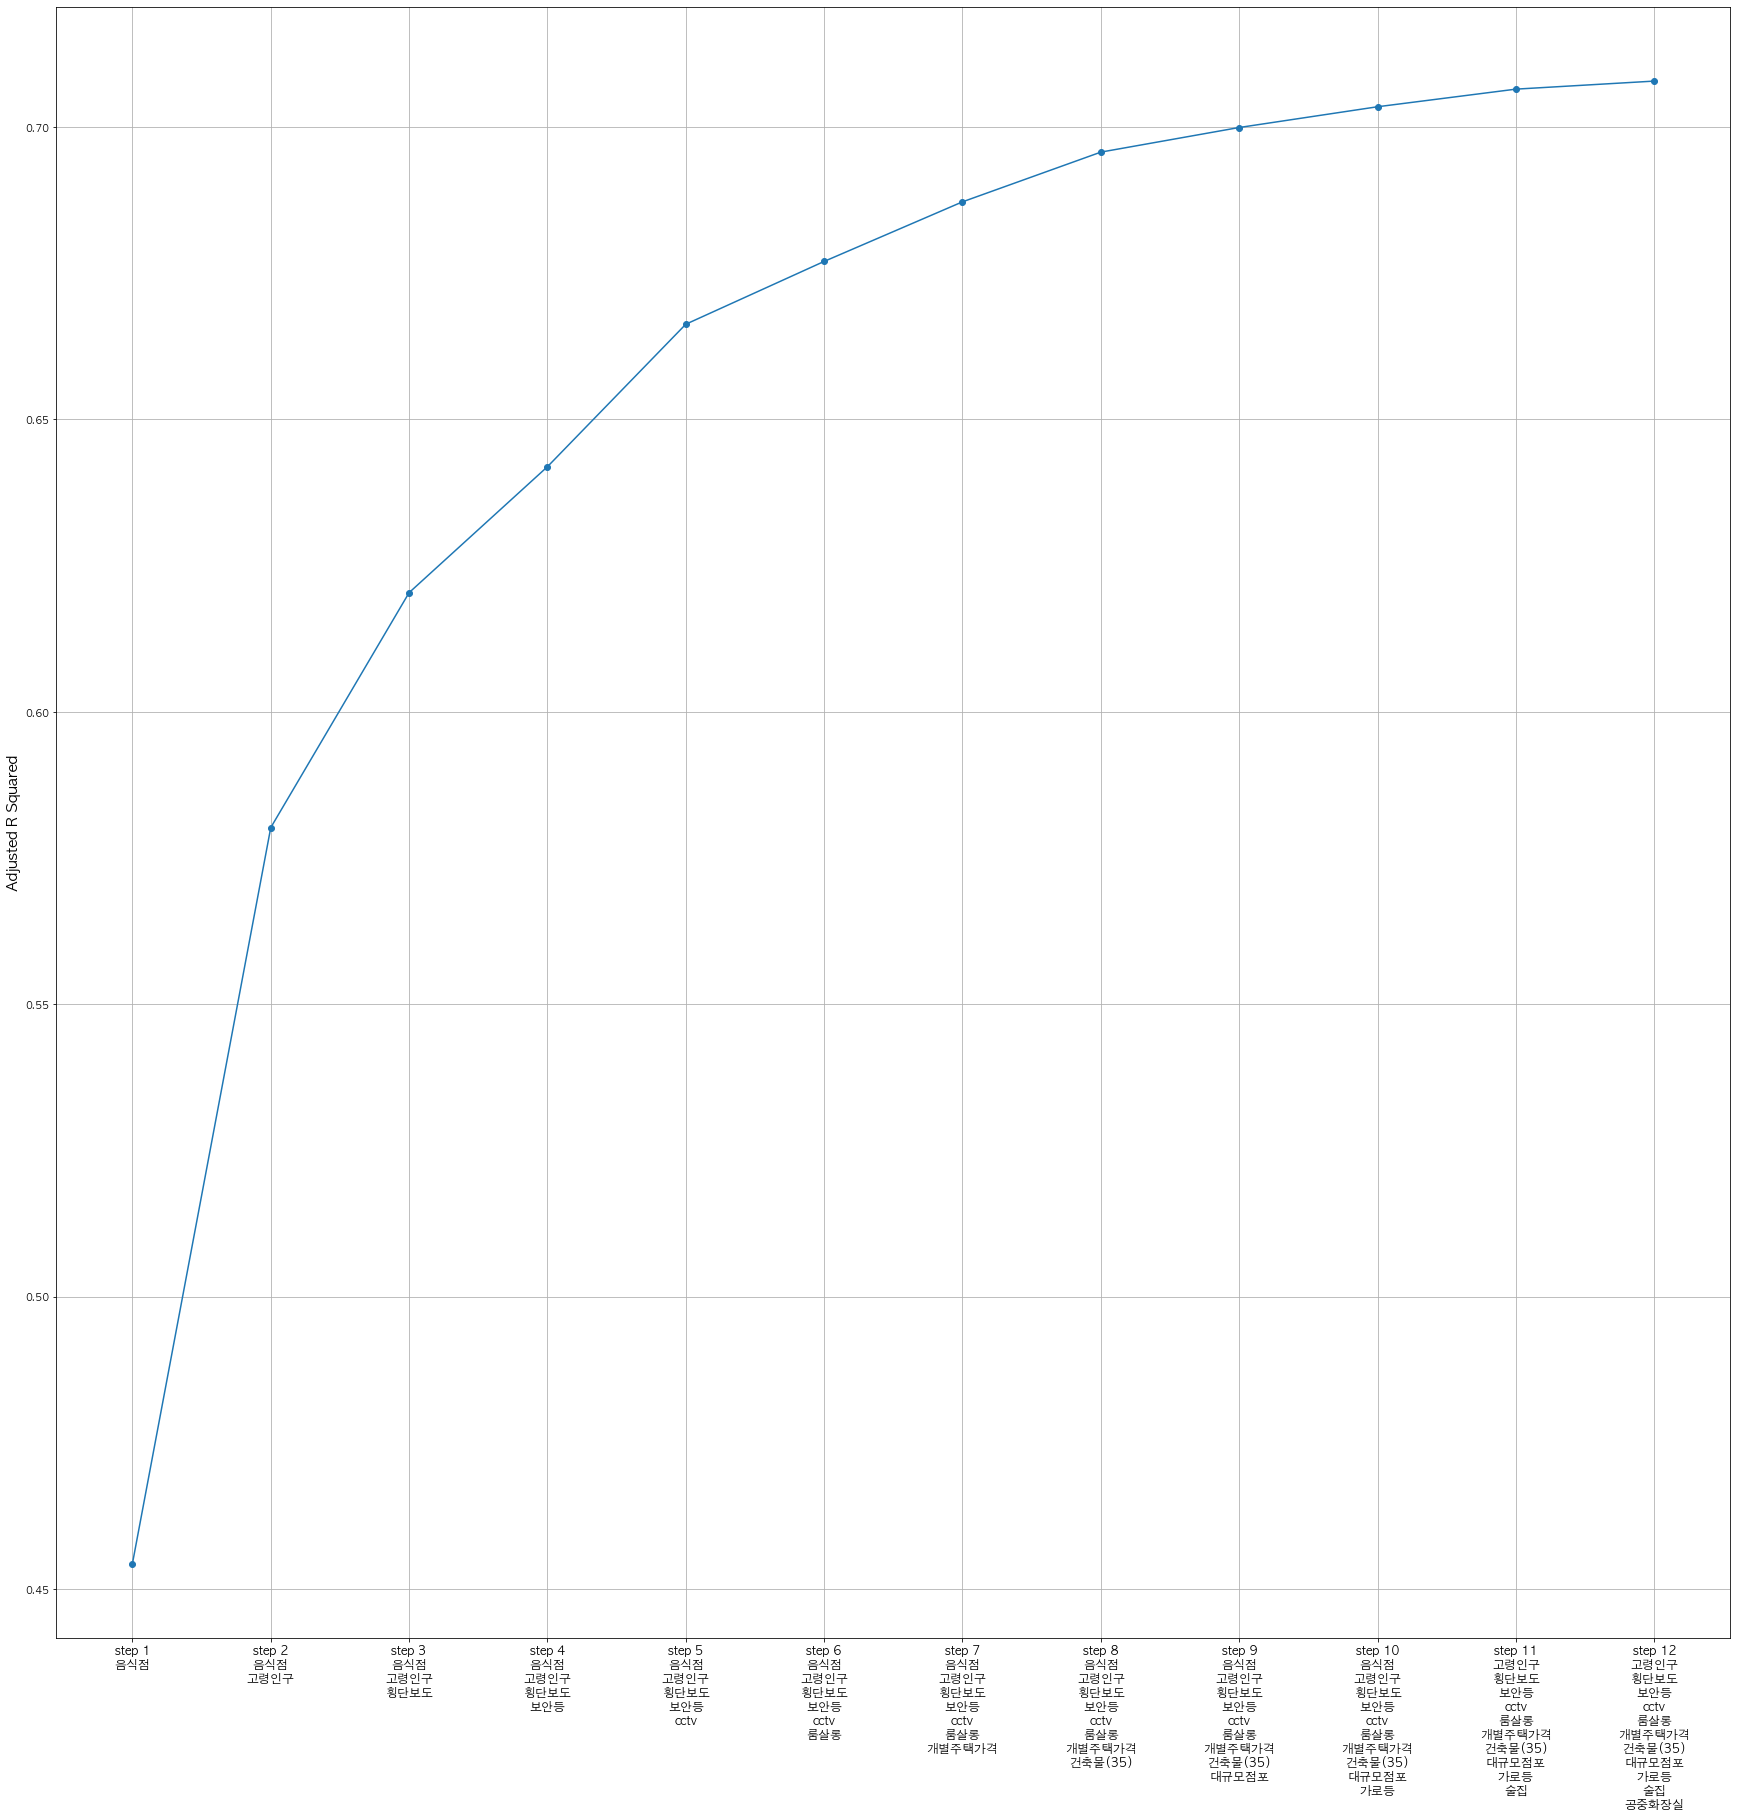

In [93]:
fig = plt.figure(figsize=(30,30))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [94]:
scaler = StandardScaler()
new_grid[numerical_feats] = scaler.fit_transform(new_grid[numerical_feats])

In [95]:
X = feature
y = target

selected_variables = [] ## 선택된 변수들

sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(feature) > 0:
    remainder = list(set(feature) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = feature[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(target,sm.add_constant(feature[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [96]:
# 다중 선형회귀분석
x_data = new_grid[selected_variables]
y = target

# for b0, 상수항 추가
X = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y, X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GRADE_폭력   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     135.1
Date:                Fri, 20 Aug 2021   Prob (F-statistic):          9.48e-168
Time:                        01:21:26   Log-Likelihood:                -1065.8
No. Observations:                 665   AIC:                             2158.
Df Residuals:                     652   BIC:                             2216.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6105      0.047     34.219      0.000       1.518       1.703
음식점            0.1532      0.147      1.042      0.298      -0.135       0.442
고령인구           0.9311      0.109      8.579      0.000       0.718       1.144
횡단보도           0.3098      0.077      4.039      0.000       0.159       0.460
보안등           -0.5617      0.063     -8.986      0.000      -0.684      -0.439
cctv           0.4145      0.089      4.666      0.000       0.240       0.589
룸살롱            0.2041      0.060      3.400      0.001       0.086       0.322
개별주택가격         0.3398      0.061      5.587      0.000       0.220       0.459
건축물(35)        0.2278      0.071      3.208      0.001       0.088       0.367
대규모점포         -0.1373      0.054     -2.529      0.012      -0.244      -0.031
가로등            0.2816      0.076      3.716      0.000       0.133       0.430
술집             0.3759      0.129      2.905      0.004       0.122       0.630
성폭력취약인구       -0.2180      0.109     -2.002      0.046      -0.432      -0.004
==============================================================================
Omnibus:                      162.313   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.630
Skew:                           1.239   Prob(JB):                     5.59e-91
Kurtosis:                       5.976   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
acc=accuracy_score(target,y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=y_pred) 
con_mat 

accuracy = 0.43157894736842106


array([[258,   0,   0,  17,   2,   0,  61,   0,   0,   0,   0],
       [ 94,   0,   0,   8,   0,   0,  11,   0,   0,   0,   0],
       [ 12,   0,   0,  10,   0,   0,   0,   0,   0,   0,   0],
       [ 21,   0,   0,  29,   0,   0,   2,   0,   0,   0,   0],
       [ 21,   0,   0,  23,   0,   0,   1,   0,   0,   0,   0],
       [ 18,   0,   0,  22,   0,   0,   1,   0,   0,   0,   0],
       [  9,   0,   0,  18,   0,   0,   0,   0,   0,   0,   0],
       [  9,   0,   0,   8,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   5,   0,   0,   0,   0,   0,   0,   0]])

In [111]:
new_grid['폭력범주']=0
new_grid.loc[new_grid['GRADE_폭력']==0,'폭력범주'] = 0
new_grid.loc[(new_grid['GRADE_폭력']>0)&(new_grid['GRADE_폭력']<4),'폭력범주'] =1
new_grid.loc[(new_grid['GRADE_폭력']>3)&(new_grid['GRADE_폭력']<7),'폭력범주'] = 2
new_grid.loc[(new_grid['GRADE_폭력']>6)&(new_grid['GRADE_폭력']<10),'폭력범주'] = 3

In [112]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
model.fit(X=feature, y=new_grid[['폭력범주']]) # 학습수행 
y_pred = model.predict(X = feature)
acc=accuracy_score(new_grid[['폭력범주']],y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=new_grid[['폭력범주']], y_pred=y_pred) 
con_mat 

accuracy = 0.48120300751879697


array([[225,  43,  75,   0],
       [ 90,  48,  49,   0],
       [ 15,  51,  47,   0],
       [  4,   9,   9,   0]])

In [98]:
print(len(new_grid[new_grid['GRADE_폭력']==0]))
print(len(new_grid[new_grid['GRADE_폭력']>0]))

338
327


In [99]:
violence_0 = new_grid.query('GRADE_폭력<1')
violence_1 = new_grid.query('GRADE_폭력<=2 & GRADE_폭력>=1')
violence_2 = new_grid.query('GRADE_폭력<5 & GRADE_폭력>=3')
violence_3 = new_grid.query('GRADE_폭력<=6 & GRADE_폭력>=5')
violence_4 = new_grid.query('GRADE_폭력<=8 & GRADE_폭력>=7')
violence_5 = new_grid.query('GRADE_폭력<=10 & GRADE_폭력>=9')

In [100]:
print(len(violence_0),len(violence_1),len(violence_2),len(violence_3),len(violence_4),len(violence_5))

338 135 97 68 20 7
